<a id='content'></id>

**Декомпозиция задачи:**

- [1: Обзор данных](#1)
 - [1.1: Загрузка и первичный осмотр данных](#1_1)
 - [1.2: Вывод подраздела](#1_2)


- [2: Предобработка данных](#2)
 - [2.1: Изменения названия и типа данных в столбцах](#2_1)
 - [2.2: Обработа пропущенных значений](#2_2)
 - [2.3: Поиск и обработка выбросов](#2_3)
 - [2.4: Поиск и удаления дубликатов](#2_4)
 - [2.5: Вывод подраздела](#2_5)
 


- [3: Исследовательский анализ данных](#3)
 - [3.1: Создание профилей пользователей](#3_1)
 - [3.2: Добавление новых столбцов](#3_2)
 - [3.3: Изучение источников](#3_3)
 - [3.4: Изучение времени сессий](#3_4)
 - [3.5: Изучение видов действий пользователей](#3_5)
 - [3.6: Построение и анализ воронок и конверсий](#3_6)
 - [3.7: Вывод подраздела](#3_7) 


- [4: Проверка гипотез](#4)
 - [4.1: Гипотеза №1: Конверсия в просмотры контактов различается у групп совершивших действия **tips_show и tips_click**, и групп совершивших только **tips_show**](#4_1)
 - [4.2: Гипотеза №2: Длительность сессии влияет на конверсию в просмотры контактов](#4_2)
 - [4.3: Вывод подраздела](#4_3)

- [5: Общие выводы и рекомендации](#5)


- [6: Ссылка на презентацию](#6)




<a id='1'></id>



In [1]:
# добавим нужные библиотеки

import pandas as pd
import math as mth
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy import stats as st

# добавим фильтр warning

import warnings
warnings.filterwarnings('ignore')

<a id='1'></id>

# [1: Обзор данных](#content)


<a id='1_1'></id>

## [1.1: Загрузка и первичный осмотр данных](#content)

In [2]:
# загрузим наши данные

try:
    source, event = (
        pd.read_csv('data/mobile_sourсes.csv'), 
        pd.read_csv('data/mobile_dataset.csv')
    )
    
except:
    source, event = (
        pd.read_csv('link to the file'), 
        pd.read_csv('link to the file')
    )

In [3]:
# изучим датасет с источниками

print('Изучим датасет с источниками с которого пользователь установил приложение:')

display(source.head())

print('\nОбщая информация об источниках с которого пользователь установил приложение:\n')

display(source.info())



Изучим датасет с источниками с которого пользователь установил приложение:


,userId,source
0,020292ab-89bc-4156-9acf-68bc2783f894,other
1,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
2,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex
3,d9b06b47-0f36-419b-bbb0-3533e582a6cb,other
4,f32e1e2a-3027-4693-b793-b7b3ff274439,google



Общая информация об источниках с которого пользователь установил приложение:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   userId  4293 non-null   object
 1   source  4293 non-null   object
dtypes: object(2)
memory usage: 67.2+ KB


None

Данные об источниках с которого пользователь установил приложение мы поместили в переменную **source**.

Согласно информации мы видим:
 - в таблице: **2** столбца и **4293** строки,
 - нет пропущенных значений,
 - тип файлов в обоих столбцах - **object**,
 - название столбцов можно привести к общему типу или змеинному регистру для дальнейшего удобства использования.

In [4]:
# изучим датасет с событиями

print('Изучим датасет с событиями:')

display(event.head())

print('\nОбщая информация о событиях:\n')

display(event.info())

print('\nОписательнная статистика для событий:\n')

event.describe()

Изучим датасет с событиями:


,event.time,event.name,user.id
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c



Общая информация о событиях:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event.time  74197 non-null  object
 1   event.name  74197 non-null  object
 2   user.id     74197 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


None


Описательнная статистика для событий:



,event.time,event.name,user.id
count,74197,74197,74197
unique,74197,16,4293
top,2019-11-02 19:42:14.302108,tips_show,cb36854f-570a-41f4-baa8-36680b396370
freq,1,40055,478


Данные о событиях совершенных пользователями мы поместили в переменнуж **event**.

Согласно информации мы видим:
 - в таблице **3** столбца и **74 197** строк,
 - нет пропущенных значений,
 - в столбце `event.time` следует изменить тип данных на **datetime** и округлить до секунд,
 - название столбцов можно привести к общему типу или змеинному регистру для дальнейшего удобства использования.

Согласно описательной статистике мы видим, что:
 - у нас **4 293** уникальных пользователя,
 - также **16** уникальных событий,
 - самое распространенной событие **tips_show** которое встретилось **40 055** - это больше 50%.
 - максимальное число событий у одного пользователя равно **478**.

<a id='1_2'></id>

## [1.2: Вывод подраздела](#content)

В нашем распоряжении оказалось 2 датасета: с информацией об источнике привлечения, а второй с онформацией о событиях, которые совершают пользователи. Оба этих датасета связанны общим идентификатором пользователя. 

С источниками все довольно просто: здесь представлена информация об уникальном-id пользователя и источнике привлечения. 

С логами пользователей на первый взгляд тоже не так сложно: мы имеем 3 столбца(время события, название события и уникальный-id пользователя). Время выраженно в милисекундах судя по виду, для удобства лучше округлить до секунд и следует изменить тип данных. Также мы видим, что у нас есть 16 событий, которые совершают пользователи. Уникальный-id схож с предыдущей таблицей, по нему можно объеденить их.

В общем мы можем видеть следующее: какой именно пользователи и из какого источника, совершил то или иное событие, а также во сколько он его совершил с точностью до милисекунд.

Мы заметили, что пропущенных значений нет, но это не говорит о том, что в данных могут быть неявные пропуски или выбросы. Также стоит отметить, что для удобства дальнейшего исследования мы переименуем столбцы в удобный для нас формат.


**Заказчик нам предоставил описание данных:**

Колонки в **mobile_sources.csv**: 

- `userId` — идентификатор пользователя,
- `source` — источник, с которого пользователь установил приложение.

Колонки в **mobile_dataset.csv:**

- `event.time` — время совершения,
- `user.id` — идентификатор пользователя,
- `event.name` — действие пользователя.

**Виды действий:**

- `advert_open` — открыл карточки объявления,
- `photos_show` — просмотрел фотографий в объявлении,
- `tips_show` — увидел рекомендованные объявления,
- `tips_click` — кликнул по рекомендованному объявлению,
- `contacts_show` и `show_contacts` — посмотрел номер телефона,
- `contacts_call` — позвонил по номеру из объявления,
- `map` — открыл карту объявлений,
- `search_1`—`search_7` — разные действия, связанные с поиском по сайту,
- `favorites_add` — добавил объявление в избранное.

<a id='2'></id>

# [2: Предобработка данных](#content)

Поскольку о данных нам ничего не известно мы проведем предобработку с ними. Приведем название столбцов к общему типу. Проверим тип данных в столбцах и если нужно изменим его на более подходящий нам для исследования. В данных могут быть явные и неявные пропущенные значения, поэтому стоит проверить их на пропуски и если встретим, то избавится от последних. Также стоит перед исследованием проверить данные на выбросы, если потребуется приведем их к средним значениям или медиане, или попросту удалим, если пропусков не слишком много и они не повлияют на дальнейшее исследование. По окончанию проверим датасет на наличие явных дубликатов и если обнаружим, то удалиь их.

<a id='2_1'></id>

## [2.1: Изменения названия и типа данных в столбцах](#content)

In [5]:
# приведем название столбцов к общему типу для удобства работы с ними вдальнейшем

event.columns = event.columns.str.replace('.', '_')
source.rename(columns={'userId': 'user_id'}, inplace=True)

In [6]:
# логи могут дублироваться, поэтому перед округлением милисекунд до секунд, пока данные максимально точны
# давайте поищем дубликаты и если есть удалим их

print('Количество дубликатов в данных {}'.format(event.duplicated().sum()))



Количество дубликатов в данных 0


In [7]:
# изменим тип данных в столбце с датой

event['event_time'] = event['event_time'].astype('datetime64[s]')

In [8]:
# проверим изменения

display(source, event)

,user_id,source
0,020292ab-89bc-4156-9acf-68bc2783f894,other
1,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
2,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex
3,d9b06b47-0f36-419b-bbb0-3533e582a6cb,other
4,f32e1e2a-3027-4693-b793-b7b3ff274439,google
...,...,...
4288,b86fe56e-f2de-4f8a-b192-cd89a37ecd41,yandex
4289,424c0ae1-3ea3-4f1e-a814-6bac73e48ab1,yandex
4290,437a4cd4-9ba9-457f-8614-d142bc48fbeb,yandex
4291,c10055f0-0b47-477a-869e-d391b31fdf8f,yandex


,event_time,event_name,user_id
0,2019-10-07 00:00:00,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c
...,...,...,...
74192,2019-11-03 23:53:29,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9
74193,2019-11-03 23:54:00,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9
74194,2019-11-03 23:56:57,search_1,20850c8f-4135-4059-b13b-198d3ac59902
74195,2019-11-03 23:57:06,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9


<a id='2_2'></id>

## [2.2: Обработа пропущенных значений](#content)


В обзоре данных мы уже отметили, что явных пропусков в данных нет - но, это не говорит о том, что все впорядке. На всякий случай проверим данные на неявные пропуски. Для этого исследуем каждый столбец каждого датасета.

**Что мы сможем проверить:**
 - столбец `user_id` в обоих датасетах - ранее мы уже проверили уникальнных пользователей в обоих датасетах, их число совпало, там что можем пропустить этот шаг;
 - столбец `source` в датасете **source** - исследуем источники, узнаем сколько их и проверим как они записаны, вполне возможно, что один и тотже источник записан по-разному;
 - столбец `event_time` в датасете **event** - исследуем дату, мы точно знаем от заказчика, что в датасете содержатся данные пользователей, впервые совершивших действия в приложении после 7 октября 2019 года;
 - столбец `event_name` в датасете **event** - столбец в котором описываются действия, которые совершили пользователи. Из описания мы точно знаем их количество и как они записаны. Проверим и эту информацию.
 
**Дополнительно рассмотрим некоторые виды взаимодействия, которые показались странными или неточными ранее!**

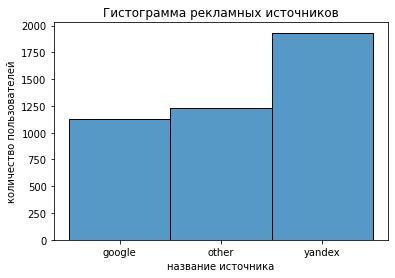

In [9]:
# поищем неявные пропуски среди рекламных источников

sns.histplot(source['source'].sort_values())

plt.title('Гистограмма рекламных источников')
plt.xlabel('название источника')
plt.ylabel('количество пользователей');

Рекламных источников всего - **3**: Яндекс, Гугл и другие. Видим, что пропусков здесь нет, идем дальше.

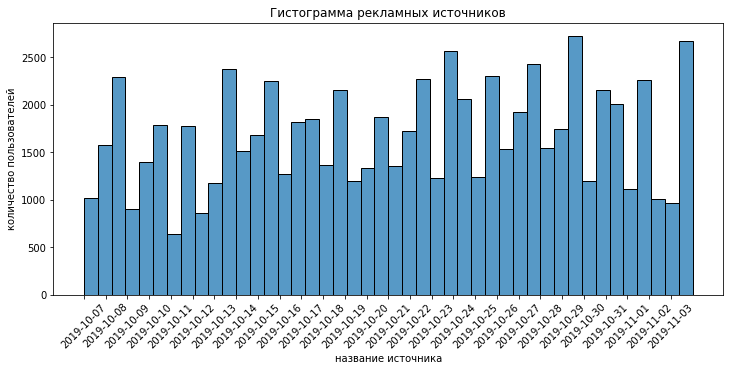

In [10]:
# проверим дату и время

plt.figure(figsize=(12,5))

sns.histplot(event['event_time'])

ticks = [x for x in event['event_time'].dt.date.unique()]
labels = event['event_time'].dt.date.unique()

plt.xticks(ticks=ticks, labels=labels, rotation=45)

plt.title('Гистограмма рекламных источников')
plt.xlabel('название источника')
plt.ylabel('количество пользователей')
plt.show();

Что касается даты и времени, то здесь тоже пропущенных значений не наблюдаем. Диапазон схож с заданием - начинается от 7 октября 2019 года включительно. Количество логов в день выглядит реалистично.

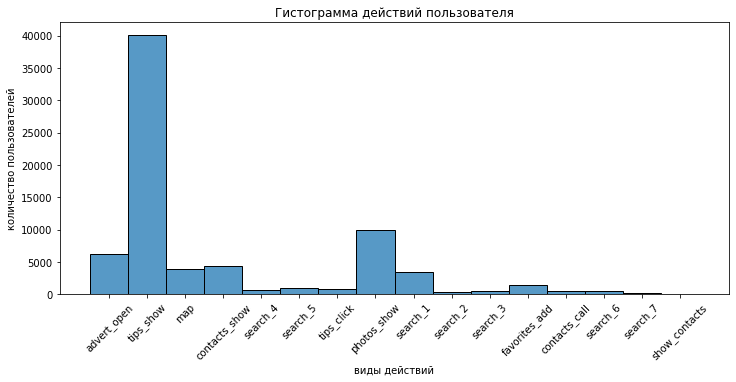

In [11]:
# посмотрим на действия пользователей

plt.figure(figsize=(12,5))

sns.histplot(event['event_name'])

ticks = [x for x in range(len(event['event_name'].unique()))]
label = event['event_name'].unique()

plt.xticks(ticks=ticks, label=label, rotation=45)

plt.title('Гистограмма действий пользователя')
plt.xlabel('виды действий')
plt.ylabel('количество пользователей')
plt.show();

Еще при обзоре данных и их описание мы могли отметить несколько столбцок, которые показались нам странными, давайте их рассмотрим подробнее:
 - `contacts_show` и `show_contacts` — посмотрел номер телефона,
 - `search_1`—`search_7` — разные действия, связанные с поиском по сайту.
 
Мы можем смело предположить, что действия `contacts_show` и `show_contacts` - это одно и тоже действия, поэтому можно их объеденить в один столбец. Сложно сказать почему так получилось, возможно какие-то факторы при выгрузке или разные базы данных.

Далее у нас поиски `search_1`—`search_7` - подробного описания у нас нет. Из описания мы точно можем предположить, что все эти действия связанны с поисковой строкой, а вот какие именно у нас информации нет: возможно дополнительные фильтры настройки поиска. В целом мы можем в будущем строить воронки ссылаясь на эти данные, но будут ли они отражать действительнность сейчас, без анализа сложно сказать. С другой стороны взглянув на гистограмму выше, мы видим, что большинство действий приходится на `search_1`. 

**Перед принятием решения по объеденению подробнее изучим действия `search_1`—`search_7`**

In [12]:
# изучим `search_1`—`search_7`

print('Узнаем количество всех действий в нашем датасете')

display(event['event_name'].value_counts())


print('Процентное соотношения действий связанных с поиском (search) от всех действий совершаемых пользователями')

display(event[ event['event_name'].str.contains('search') ]['event_name'].value_counts() / len(event) * 100)


print('Процентное соотношения действий связанных с поиском (search) от действий связанных с поиском (search)')

event[ event['event_name'].str.contains('search') ]['event_name'].value_counts() / len(event[ event['event_name'].str.contains('search') ]['event_name']) * 100



Узнаем количество всех действий в нашем датасете


tips_show        40055
photos_show      10012
advert_open       6164
contacts_show     4450
map               3881
search_1          3506
favorites_add     1417
search_5          1049
tips_click         814
search_4           701
contacts_call      541
search_3           522
search_6           460
search_2           324
search_7           222
show_contacts       79
Name: event_name, dtype: int64

Процентное соотношения действий связанных с поиском (search) от всех действий совершаемых пользователями


search_1    4.725258
search_5    1.413804
search_4    0.944782
search_3    0.703532
search_6    0.619971
search_2    0.436675
search_7    0.299203
Name: event_name, dtype: float64

Процентное соотношения действий связанных с поиском (search) от действий связанных с поиском (search)


search_1    51.680425
search_5    15.462854
search_4    10.333137
search_3     7.694575
search_6     6.780660
search_2     4.775943
search_7     3.272406
Name: event_name, dtype: float64

Видим, что разных действий, связанные с поиском по сайту от общего числа действий у нас не больше 10%. Если рассматривать более детально между собой только действий связанных с поиском (search), то здесь видим, что около 50% всех действия связанно с `search_1`, оставшиеся 25% поделили между собой действия `search_5` - 15% и `search_4` - 10%. 


**Я предлагаю объеденить все действия связанные с поиском по сайту в одно!** Данные мы не удаляем, а погрешность нашего исследования будет не так значительна, получается мы изменим из 10% от всех данных около половины после объеденения.

In [13]:
# заменим `search_1`—`search_7` на `search`

values =  event[ event['event_name'].str.contains('search') ]['event_name'].unique()

event['event_name'].where(~(event['event_name'].isin(values)), 'search', inplace=True)

In [14]:
# соеденим `contacts_show` и `show_contacts` в одно действие `contacts_show`

event['event_name'].where(~(event['event_name'].isin(['show_contacts'])), 'contacts_show', inplace=True)

Узнаем количество всех действий в нашем датасете


tips_show        40055
photos_show      10012
search            6784
advert_open       6164
contacts_show     4529
map               3881
favorites_add     1417
tips_click         814
contacts_call      541
Name: event_name, dtype: int64

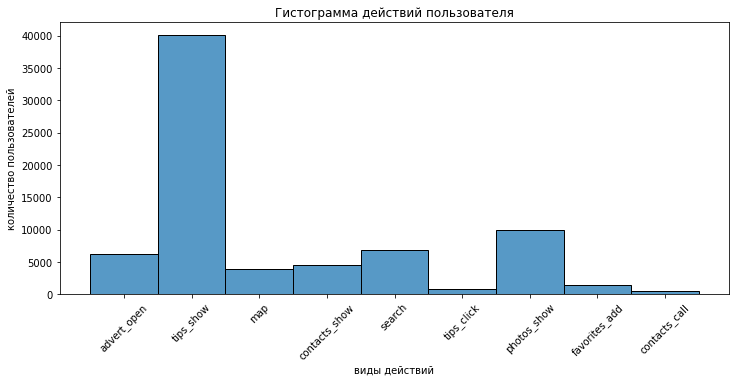

In [15]:
# проверим замену

print('Узнаем количество всех действий в нашем датасете')

display(event['event_name'].value_counts())

# посмотрим на действия пользователей

plt.figure(figsize=(12,5))

sns.histplot(event['event_name'])

ticks = [x for x in range(len(event['event_name'].unique()))]
label = event['event_name'].unique()

plt.xticks(ticks=ticks, label=label, rotation=45)

plt.title('Гистограмма действий пользователя')
plt.xlabel('виды действий')
plt.ylabel('количество пользователей')
plt.show();

**Видим, что замену произвели правильно, теперь можно двигаться дальше!**

<a id='2_3'></id>

## [2.3: Поиск и обработка выбросов](#content)


Нам доступны логи пользователей, что здесь мы можем посчитать выбросом? Изучив немного данные можем лишь отметить большое количество действий `tips_show` - увидел рекомендованные объявления - но опять же можем допустить, что пользователь заходя на сайт видит рекомендации и просматривает их, даже не задействуя поиска. У нас сервис по ненужным вещам, где можно совершить различные покупки.

**Изучим количество совершенных действий.**

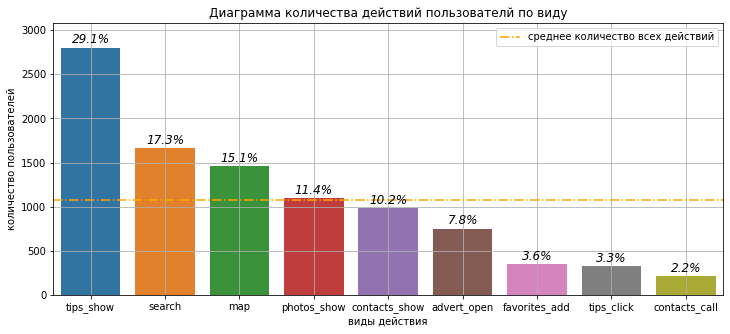

In [16]:
# построим диаграмму количества действий


# создадим датафрейм data, где сгруппируем по видам действия и посчитаем количество пользователей совершивших их

data = (
    event.groupby('event_name', as_index=False)['user_id'].nunique()
    .sort_values('user_id', ascending=False)
    .reset_index(drop=True)
)

# добавим столбец с процентами вида совершенных действий ото всех действий

data['prc'] = data.apply(lambda x: str(round((x['user_id'] / data['user_id'].sum()) * 100, 1)) + '%', axis=1 )



# построим диаграмму видов действий и их количества

plt.figure(figsize=(12,5))

ax = sns.barplot(data=data, x='event_name', y='user_id')

ax.set_title('Диаграмма количества действий пользователй по виду')
ax.set_xlabel('виды действия')
ax.set_ylabel('количество пользователей')

ax.set_ylim(ymax=data['user_id'].max() * 1.1)

for index, row in data.iterrows():
    ax.text(index, row[1] + 50, row[2], ha='center', style='italic', fontsize=12)
    
ax.axhline(y=data['user_id'].mean(), ls='-.', c='orange', label= 'среднее количество всех действий')

ax.legend()
    
ax.grid();

На диаграмме мы хорошо видим, что порядка 30% всех совершенных действий - это `tips_show` - увидел рекомендованные объявления. 

**Поступим следующим образом:**
 - посчитаем количество совершенных действий по каждому пользователю

In [17]:
# создадим сводную таблицу уникальных пользователей и количество совершенных ими действий
# перезапишем data 

data = (
    event.pivot_table(index='user_id', columns='event_name', values='event_time', aggfunc='count')
    .rename_axis(None)
)

# добавим столбец с суммой совершенных действий у пользователя

data['all_events'] = data.loc[:,'advert_open':].sum(axis=1)

# выведем первые 5 строк на экран отсортировав по tips_show от большего к меньшему

data.sort_values('tips_show', ascending=False).head()

event_name,advert_open,contacts_call,contacts_show,favorites_add,map,photos_show,search,tips_click,tips_show,all_events
21230dd9-2f7f-4b77-a436-43d4d10388e0,NaN,NaN,43.0,1.0,9.0,NaN,NaN,1.0,346.0,400.0
cb36854f-570a-41f4-baa8-36680b396370,NaN,NaN,86.0,NaN,68.0,NaN,NaN,7.0,317.0,478.0
28fccdf4-7b9e-42f5-bc73-439a265f20e9,6.0,NaN,2.0,NaN,NaN,NaN,4.0,2.0,294.0,308.0
abdcbe3c-221b-4f59-afd9-bf9ca78f7e4c,NaN,NaN,21.0,NaN,53.0,NaN,17.0,NaN,265.0,356.0
c140f88a-c544-4ce6-a6bd-578a1a0d1b18,35.0,NaN,1.0,NaN,13.0,NaN,NaN,NaN,239.0,288.0


In [18]:
# узнаем сколько в среднем пользователи совершают действий

data.describe()

event_name,advert_open,contacts_call,contacts_show,favorites_add,map,photos_show,search,tips_click,tips_show,all_events
count,751.000000,213.000000,981.000000,351.000000,1456.000000,1095.000000,1666.000000,322.000000,2801.000000,4293.000000
mean,8.207723,2.539906,4.616718,4.037037,2.665522,9.143379,4.072029,2.527950,14.300250,17.283252
std,12.699375,2.387972,9.621611,6.291609,4.750844,14.614813,5.162312,2.942993,23.120743,29.130677
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,1.000000,3.000000,2.000000,1.000000,4.000000,5.000000
50%,4.000000,2.000000,2.000000,2.000000,1.000000,5.000000,3.000000,1.000000,8.000000,9.000000
75%,8.500000,3.000000,4.000000,5.000000,3.000000,9.000000,4.000000,3.000000,15.000000,17.000000
max,137.000000,17.000000,137.000000,63.000000,71.000000,177.000000,68.000000,30.000000,346.000000,478.000000


Мы видим, что в среднем пользователи совершают около 17-18 действий, более 75% не совершают больше 17 действий. 

In [19]:
# узнаем сколько пользователей совершают более 17 действий

print(f'''
Количество пользователей, которые в среднем совершают больше 17 действий = {data.query('all_events > 17').index.nunique()}

''')




Количество пользователей, которые в среднем совершают больше 17 действий = 1051




Теперь мы можем видеть, что некоторые пользователи практически не совершают больше никаких действий кроме `tips_show`. С одной стороны это определенно странно, но с другой: мы можем предположить, что эта группа пользователей заходит в наше мобильное приложение и начинает просматривать рекомендации, увидев интересное - они совершают наше целевое событие - просмотра контактов и если взглянуть на таблицу, то мы можем увидеть у некоторых пользователей довольно хорошую конверсию из `tips_show` в `contacts_show` от 10% и более.

**Таким образом я предлагаю не считать слишком активные действия пользователей как выброс.** Более детально мы изучем их поведение при исследовательском анализе с учетом их ссесий и тогда сможем более детальнее изучить их поведение и выявить отдельные подгруппы слишком активных если потребуется! 

<a id='2_4'></id>

## [2.4: Поиск и удаления дубликатов](#content)

Ранее мы уже провели поиск дубликатов, еще на стадии округления милисекунд до секунд. Но сейчас мы округлили данные до секунд - поэтому могут возникнуть дубликаты, которые только внесут неточность в наше исследование. Проверим уже измененные данные на дубликаты и если потребуется - удалим их.

In [20]:
# проверим данные на дубликаты

print(f'''

В датасете event количество дубликатов: {event.duplicated().sum()}.

В датасете source количество дубликатов: {source.duplicated().sum()}.
''')

print(f'''

Вследствии удаления дубликатов мы лишимся {round((event.duplicated().sum() / len(event) * 100), 2)}% данных.

''')





В датасете event количество дубликатов: 1224.

В датасете source количество дубликатов: 0.



Вследствии удаления дубликатов мы лишимся 1.65% данных.




Вследсвия удаления мы лишимся менее 2% данных. Поэтому предлагаю удалить дубликаты, к тому же совершение действий со скоростью милисекунд кажется странным и неправдоподобным.

In [21]:
# удалим дубликаты, которые появились вследствии округления милисекунд до секунд

event.drop_duplicates(inplace=True)

<a id='2_5'></id>

## [2.5: Вывод подраздела](#content)




В разделе предобработка данных мы проделали следующие шаги:
 - изменили тип данных в столбце **event_time** датасета `event`;
 - округлили милесекунды до секунд в этом же столбце;
 - проверили данные на пропущенные значения, в результате проверки:
  - `contacts_show` и `show_contacts` — посмотрел номер телефона - объеденили в `contacts_show` поскольку эти два действия имеют одно и тоже значение;
  - `search_1`—`search_7` — разные действия, связанные с поиском по сайту - - объеденили в `search` поскольку у нас нет дополнительной информации для анализа этих действий и чтобы не вносить путаницы в дальнейшее иследование было принято такое решение.
 - исследуя выбросы мы обратили внимание, что есть пользователи совершавшие большое количество одинаковых действий. Подробно изучив их мы выявили, что у таких пользователей, напримере действия `tips_show` - хорошая конверсия в целевое событие `contacts_show`, от 10% и более. Было принято решение не избавляться на этом этапе от выбросов в их действиях, а подробнее изучить их с учетом их сессий.
 

<a id='3'></id>

# [3: Исследовательский анализ данных](#content)


Мы провели предобработку данных, теперь можем приступить к исследовательскому анализу. 

Давайте вспомним **цель исследования**: 

- Проанализировать связь целевого события — просмотра контактов — и других действий пользователей. 


- Оценить, какие действия чаще совершают те пользователи, которые просматривают контакты:
 - Провести **исследовательский анализ данных**,
 - Проанализировать **влияние событий на совершение целевого события**.
 
 
Для удобства создадим новый датасет с профилями пользователей, в него войдет вся нужная нам информация для исследования: 
 - данные первого посещения: дата и время, а также источник и вид действия
 - данные о всех видах действий совершенных пользователем, а также время в которое они были совершенны
 - добавим новые столбцы: отдельно с датой и отдельно со временем


Далее пользуясь профилями пользователей изучим следующие показатели:
 - Источники - узнаем с каких источников сколько пользователей приходят. У каких источников больше конверсия в просмотры номера телефона, а у каких меньше всего.
 - Время сессии - постараемся понять влияет и если да, то как время сессии на конверсию в просмотры телефона.
 - Виды действий пользователей - подробнее изучим виды действий пользователей, поищем взаимосвязи и построим цепочки действий.
 
Построим воронки пользователей и проанализируем конверсию в просмотр телефона у каждой из рассматриваемых воронок.

<a id='3_1'></id>

## [3.1: Создание профилей пользователей](#content)

Для дальнейшего исследовния нам необходимо создать такие профили пользователей, которые будут описывать взаимодействия пользователей с нашим мобильным приложением и поможет нам проанализировать их поведения для того чтобы ответить на интересующие нас вопросы.

**Вопросы:**
 - Какая связь целевого события — просмотра контактов и других действий?
 - Какие действия чаще совершают те пользователи, которые просматривают контакты?

**Какие параметры нам доступны из данных:**
 - `user_id` - идентификатор пользователя - по нему мы можем отследить все его действия;
 - `source` - источник рекламной компании из которого пришел пользователь - по нему мы можем узнать, какой источник показывает лучшие метрики;
 - `event_time` - дата и время совершения пользователем действий в приложении с точностью до секунд - один из важнейших для нашего исследования параметра. С его помощью мы можем сгруппировать действия по сессия, а также изучить поведения пользователя относительно времени или даты;
 - `event_name` - виды действия пользователей в мобильном приложении. С помощью него мы узнаем какие действия совершают пользователи в мобильном приложении. Сможем построить воронки и проанализировать взаимодействие пользователей с приложением.


**Дополнительные параметры** - параметры которые мы можем получить из наших данных:
 - количество сессий у пользователя - опираясь на время мы сможем сгруппировать действия пользователей на сессии, это поможет правильно построить воронки к целевому событию и лучше понять взаимодействия пользователей с мобильным приложением;


**Таким образом создадим профили пользователей** в котый войдут следующие столбцы:
 - `user_id` - уникальный идентификатор пользователя;
 - `event_dt` - дата и время совершения пользователем действия;
 - `event_date` - дата совершения пользователем действия;
 - `event_time` - время совершения пользователем действия;
 - `event_type` - виды действий (всего 9 видов);
 - `event_duration` - длительность действия (минуты);
 - `session_id` - номер сессии пользователя;
 - `source` - источник, с которого пользователь установил приложение;
 - `first_ts` - дата и время первого посещения;
 - `lifetime` - количество дней с момента первого захода у пользывателя;
 - `first_date` - дата первого посещения.


**Таким образом мы сможем отследить: какой пользователь, когда и что сделал. Также узнать сколько он совершил сессий, какие действия входили в эту сессию и их длительность, а также длительность всей сессии.**


В данном исследовании мы будем рассчитывать сессию по следующим параметрам:
 - длительность сесии будет составлять до 30 минут;
 - длительность будем рассчитывать как разницу с предыдущим действием;
 - сессии будут считаться непосредственно для каждого пользывателя.

In [22]:
# сгруппируем данные по пользователям, дате и времени и первым совершенным действием

user_profiles = (
    event.groupby(['user_id', 'event_time'], as_index=False)
    .agg({'event_name': 'first'})
    .sort_values(['user_id', 'event_time'])
    .rename(columns={'event_time': 'event_dt'})
)

In [23]:
# добавим столбец с продолжительностью действия

user_profiles['event_duration']  = user_profiles.groupby('user_id')['event_dt'].diff()

# переведем действия в минуты и округлим до десятичных

user_profiles['event_duration']  = (
    user_profiles['event_duration']
    .map(
        lambda x: round( (x.seconds / 60), 2 ) 
    )
)




In [24]:
# добавим столбец с уникальным номером сессии для каждого пользователя
# если у одного пользователя сессия между предыдущим действием больше 30 минут, то ей присваивается новый id



# создадим индексы где будет присваиватся новая сессия - это пропущенные значения длительности сессии и продол. более 30 минут

new_session = (user_profiles['event_duration'].isna()) | (user_profiles['event_duration'] > 30)



# добавим столбец session_id

user_profiles['session_id'] = (
    user_profiles.loc[new_session, ['user_id', 'event_dt']]
    .groupby('user_id')
    .rank(method='first')
    .astype(int)
    
)


# заполним пустые значения в столбцах

# в столбце event_duration заполним пропуски "0"
user_profiles['event_duration'].fillna(0, inplace=True)

# в столбце session_id заполним пропуски предыдущим значением
user_profiles['session_id'] = user_profiles['session_id'].fillna(method='ffill').astype('int')




In [25]:
# мы добавили данные длительности между действиями, но там есть очень большие данные
# например если пользователь не заходил в приложение несколько дней, то разность будет очень велика
# давайте взглянем на данные столбца

user_profiles['event_duration'].describe()

count    72902.000000
mean        46.809647
std        205.699951
min          0.000000
25%          0.300000
50%          1.100000
75%          2.850000
max       1439.720000
Name: event_duration, dtype: float64

In [26]:
# выведем логи действие которых выше 30 минут

user_profiles[ user_profiles['event_duration'] > 30]

,user_id,event_dt,event_name,event_duration,session_id
9,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-09 18:33:55,map,284.23,2
13,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-21 19:52:30,tips_show,70.13,3
27,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-22 11:18:14,map,910.73,4
44,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-20 18:49:24,search,1249.50,2
62,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-24 10:50:40,photos_show,885.07,3
...,...,...,...,...,...
72866,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2019-11-02 01:16:48,tips_show,51.92,25
72867,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2019-11-02 18:01:27,tips_show,1004.65,26
72869,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2019-11-02 19:25:53,tips_show,68.20,27
72873,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2019-11-03 14:32:55,tips_show,1142.08,28


**1 439** минут между действиями в приложении - это верно, но вдальнейшем такие данные согут исказить нам исследования. Нас же интересует время с начала ссесии, а началом новой сессии мы посчитали интервал в 30 минут.

И мы имеем около **6 000** таких логов - это точно исказит наше исследование.

Я думаю, что правильнее будет **обнулить эти данные** - ведь это начало новой сессии и соответственно снова ничинается новый отсчет

In [27]:
user_profiles.loc[ user_profiles['event_duration'] > 30, 'event_duration'] = 0

Мы создали новый датасет **user_profiles** по которому мы теперь можем исследовать взаимодействие пользователей с нашим мобильным приложением, но давайте сперва добавим несколько дополнительных столбцов.


<a id='3_2'></id>

## [3.2: Добавление новых столбцов](#content)

Вдальнейшем нам может потребоваться провести исследования взаимодействия пользователей по дате или времени. Поэтому добавим к нашему датасету **user_profiles** еще столбцов:
 - `event_date` - дата совершения пользователем действия;
 - `event_time` - время совершения пользователем действия;
 - `source` - источник, с которого пользователь установил приложение;
 - `first_ts` - дата и время первого посещения;
 - `lifetime` - количество дней с момента первого захода у пользывателя;
 - `first_date` - дата первого посещения;
 - `good_user` - пользователи совершившие целевое событие - просмотр контакта. (True - просматривал, False - нет). 

In [28]:
# добавим столбец с датой и столбец со временем

user_profiles['event_date'] = user_profiles['event_dt'].dt.date
user_profiles['event_time'] = user_profiles['event_dt'].dt.time

# добавим источник с которого пользыватель пришел в приложение (внимание: источник уникальный для каждого пользывателя, а не 
# для каждого действия!)

user_profiles = user_profiles.merge(source, on='user_id', how='left')

In [29]:
# добавим столбец с датой и временем первой сессии, чтобы вдальнейшем по нему рассчитывать лайфтаймы

first_ts = (
    user_profiles[['user_id', 'event_dt']]
    .groupby('user_id', as_index=False)
    .agg({'event_dt': 'min'})
    .rename(columns={'event_dt': 'first_ts'})
)

user_profiles = user_profiles.merge(first_ts, on='user_id', how='left')



In [30]:
# добавим столбец first_date - дата первого посещения 

user_profiles['first_date'] = user_profiles['first_ts'].dt.date

In [31]:
# добавим столбец с лайфтаймом - количеством дней в приложении для когортного анализа

user_profiles['lifetime'] = (user_profiles['event_dt'] - user_profiles['first_ts']).dt.days


In [32]:
# добавим столбец good_users (булев тип, True - пользователь хотя бы раз совершил целевое событие - просмотр контактов)

# создадим переменную good_users с id-пользователями совершившими цел событие
good_users = user_profiles.query('event_name == "contacts_show"')['user_id'].unique()

# создадим новый столбец 'good_users' присмоим сразу ему 1, а потом методом where выявим пользователей не сов. цел.действ.
user_profiles['good_user'] = 1
user_profiles['good_user'].where((user_profiles['user_id'].isin(good_users)), 0, inplace=True)

In [33]:
# давайте для удобства поменяем столбцы местами, чтобы вдальнейшем было проще воспринимать датасет

user_profiles = (
    user_profiles[['user_id',
                   'good_user',
                   'first_ts',
                   'first_date',
                   'session_id', 
                   'event_dt', 
                   'event_date', 
                   'event_time', 
                   'event_name', 
                   'event_duration',
                   'source',
                   'lifetime'
                  ]]
)

**Ранее еще на предобработке данных мы не стали искать выбросы в данных, а оставли этот шаг на потом** поэтому сейчас, когда наша таблица сформирована я предлагаю изучить пользователей и постараться избавится от выбросов, если такие обнаружатся.


**Что мы можем считать выбросом:**
 - слишком подозрительная активность пользывателя.
 
Для этого изучим действия всех пользывателей.

In [34]:
# составим таблицу активности пользывателей
# рассчитаем такие показатели: совершал целевое событие просмотр контакта или нет,
# первое посещение
# количество сессий
# количество действий
# длительность действий
# количество дней "жизни"



data = (
    user_profiles.groupby('user_id', as_index=False)
    .agg(
        {
            'good_user': 'max',
            'first_date': 'min',
            'session_id': 'max',
            'event_name': 'count',
            'event_duration': 'mean',
            'lifetime': 'max'
        })
    .rename(columns=
            {
                'session_id': 'max_session',
                'event_name': 'count_event'
            })    
)



In [35]:
# выведем таблицу на экран

data

,user_id,good_user,first_date,max_session,count_event,event_duration,lifetime
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,0,2019-10-07,4,35,1.314857,14
1,00157779-810c-4498-9e05-a1e9e3cedf93,1,2019-10-19,6,71,2.764507,14
2,00463033-5717-4bf1-91b4-09183923b9df,0,2019-11-01,1,10,2.469000,0
3,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,0,2019-10-18,6,32,3.460938,12
4,00551e79-152e-4441-9cf7-565d7eb04090,1,2019-10-25,3,8,1.165000,3
...,...,...,...,...,...,...,...
4288,ffab8d8a-30bb-424a-a3ab-0b63ebbf7b07,0,2019-10-13,2,17,2.907059,13
4289,ffc01466-fdb1-4460-ae94-e800f52eb136,1,2019-10-07,1,7,0.128571,0
4290,ffcf50d9-293c-4254-8243-4890b030b238,0,2019-10-23,1,2,0.665000,0
4291,ffe68f10-e48e-470e-be9b-eeb93128ff1a,1,2019-10-21,3,13,2.992308,6


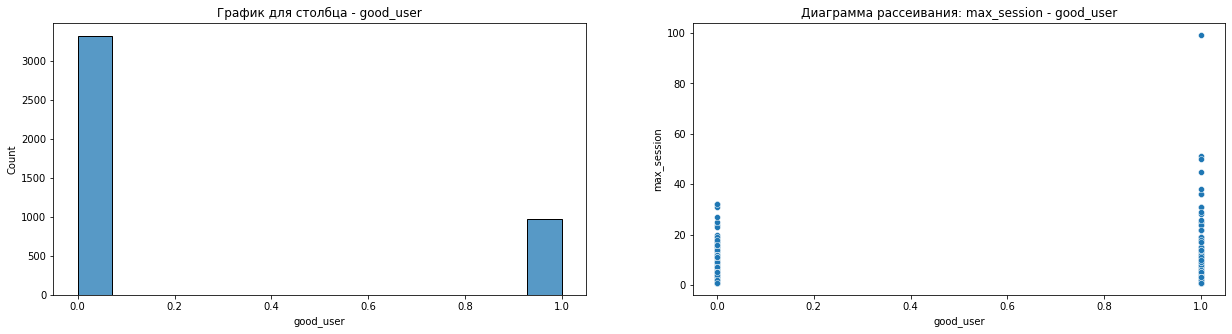

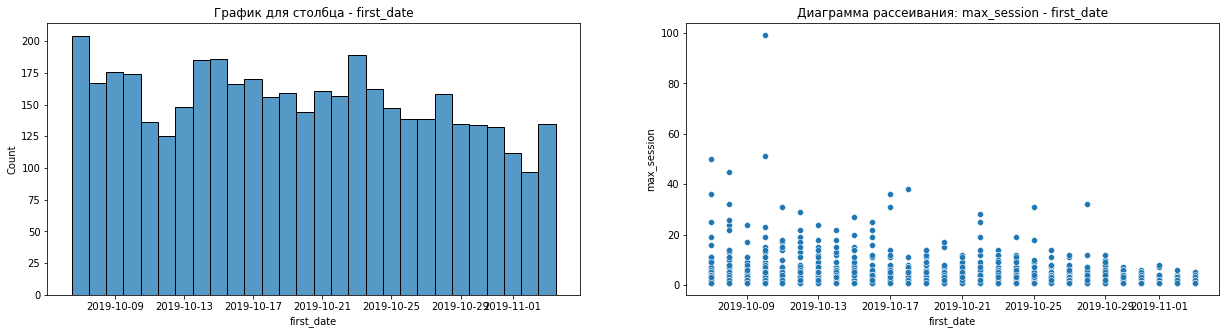

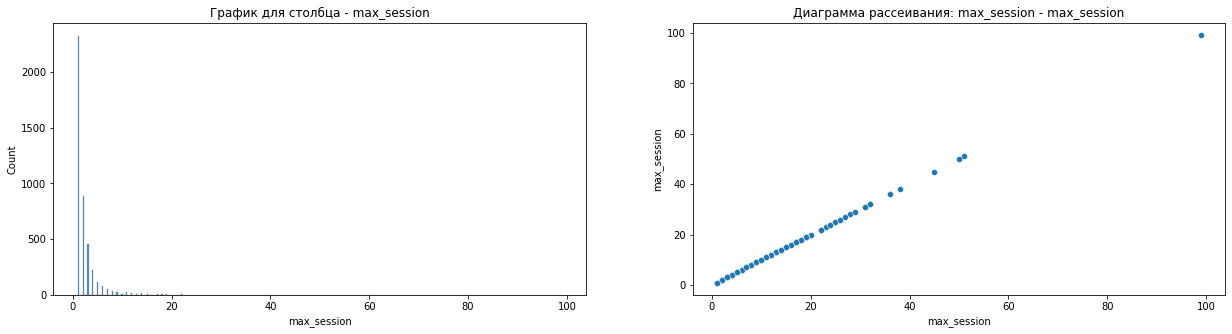

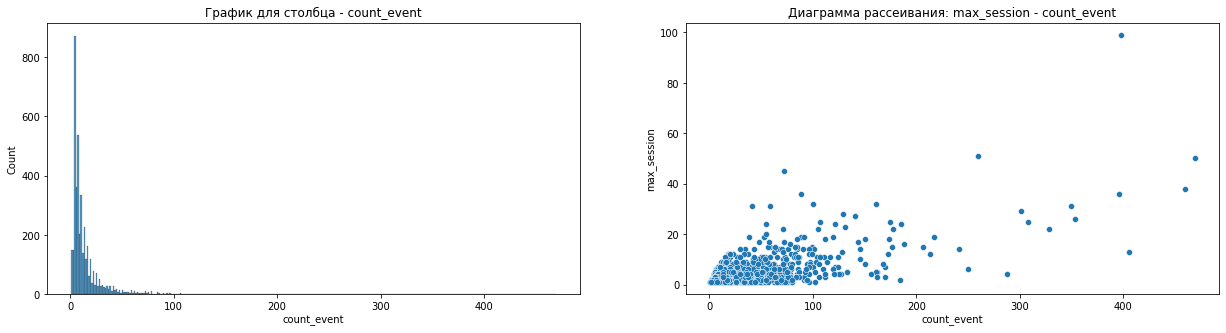

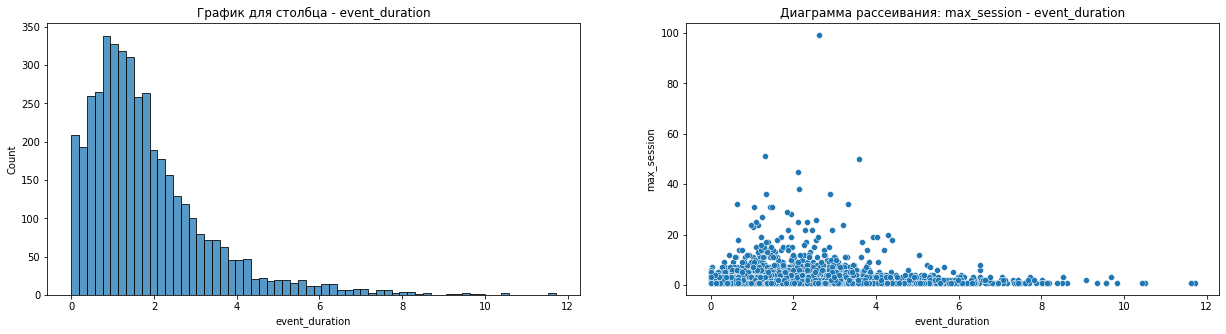

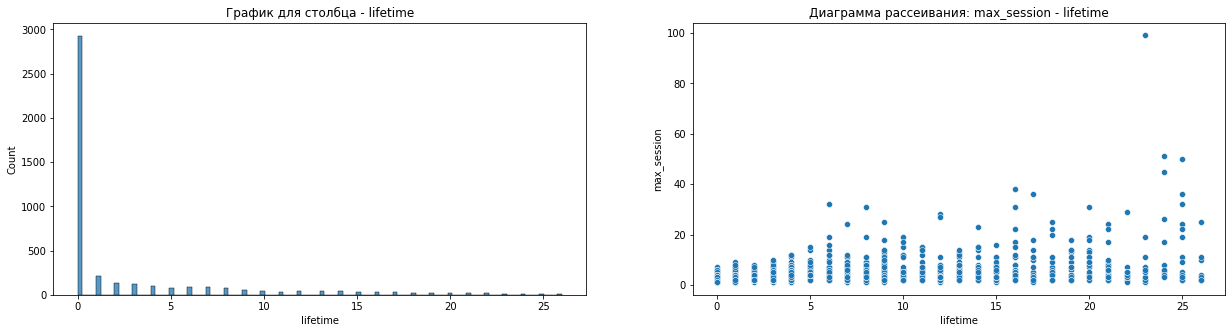

In [36]:
# давайте изучим столбцы и поищем выбросы

columns = data.drop(columns='user_id').columns


for i in columns:
    
    plt.figure(figsize=(21,5))
    
    plt.subplot(1, 2, 1)
    
    sns.histplot(data[i])
    plt.title(f'График для столбца - {i}')
    
    
    plt.subplot(1, 2, 2)
    
    sns.scatterplot(x=data[i], y=data['max_session'])
    plt.title(f'Диаграмма рассеивания: max_session - {i}')
    

Сразу бросается в глаза максимальное количество сессий - около 100. Давайте взглянем на описательную статистику данных и изучим их.

In [37]:
# выведим описательную статистику данных

data.describe()

,good_user,max_session,count_event,event_duration,lifetime
count,4293.000000,4293.000000,4293.000000,4293.000000,4293.000000
mean,0.227580,2.383182,16.981598,1.825479,2.437223
std,0.419319,3.488587,28.536326,1.465456,5.059348
min,0.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,1.000000,5.000000,0.840000,0.000000
50%,0.000000,1.000000,9.000000,1.467778,0.000000
75%,0.000000,3.000000,17.000000,2.382500,2.000000
max,1.000000,99.000000,469.000000,11.712500,26.000000


**Что мы видим:**
 - конверсию в просмотры около 23%,
 - максимальное количество сессий у 75% не превышает 3 штук. Мы можем видеть 99 сессий у одного пользывателя,
 - большое количество действий - 469, причем стоит отметить, что действия могут повторяться, это не уникальные действия, но все равно это подозрительно много,
 - лайфтайм у наших пользователей очень низкий - всего 3 дня у 75% пользывателей. Но опять же наблюдаем пользывателя, который 27 дней пользуется нашим приложением.
 
**Давайте изучем высокую активность пользывателей**

In [38]:
# изучим пользывателя у которого  99 сессий

data.query('max_session > 90')

,user_id,good_user,first_date,max_session,count_event,event_duration,lifetime
615,21230dd9-2f7f-4b77-a436-43d4d10388e0,1,2019-10-10,99,398,2.62701,23


Пользователь совершавший целевое событие - просмотр контактов, но все же его действия слишком активны. 
Пользователь подозрительный, мы уберем его из нашего исследования. Чтобы составить картину, которая будет отражать поведения большинства пользователей - такие вот уникальные пользыватели нам исказят результаты. 

Давайте изучем остальных пользователей.

In [39]:
# выведим описательную статистику данных по срезу

print('Описательная статистика по срезу: у пользователя меньше 90 сессий')
display(data.query('max_session < 90').describe())

# изучим процентили 

columns = data.drop(columns=['user_id', 'good_user', 'first_date']).columns

for col in columns:
    print('''
          Перцентили для стобца {}: 
          95-перцентиля составдяет {:.2f},
          97-перцентиля составдяет {:.2f},
          99-перцентиля составдяет {:.2f}.
          '''.format(col,
                     np.percentile(data.query('max_session < 90')[col], 95),
                     np.percentile(data.query('max_session < 90')[col], 97),
                     np.percentile(data.query('max_session < 90')[col], 99) 
                    ))

Описательная статистика по срезу: у пользователя меньше 90 сессий


,good_user,max_session,count_event,event_duration,lifetime
count,4292.000000,4292.000000,4292.000000,4292.000000,4292.000000
mean,0.227400,2.360671,16.892824,1.825293,2.432432
std,0.419202,3.161824,27.940496,1.465575,5.050189
min,0.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,1.000000,5.000000,0.840000,0.000000
50%,0.000000,1.000000,9.000000,1.467556,0.000000
75%,0.000000,3.000000,17.000000,2.381989,2.000000
max,1.000000,51.000000,469.000000,11.712500,26.000000



          Перцентили для стобца max_session: 
          95-перцентиля составдяет 7.00,
          97-перцентиля составдяет 9.00,
          99-перцентиля составдяет 15.09.
          

          Перцентили для стобца count_event: 
          95-перцентиля составдяет 58.00,
          97-перцентиля составдяет 75.00,
          99-перцентиля составдяет 125.18.
          

          Перцентили для стобца event_duration: 
          95-перцентиля составдяет 4.71,
          97-перцентиля составдяет 5.57,
          99-перцентиля составдяет 7.12.
          

          Перцентили для стобца lifetime: 
          95-перцентиля составдяет 15.00,
          97-перцентиля составдяет 18.00,
          99-перцентиля составдяет 22.00.
          


In [40]:
# давайте сделаем срез по 99 перцентили

data.query('max_session > 15.09 or count_event > 125.18 or lifetime > 22')

# создадим переменную, куда войдут id подозрительнных пользователей

suspicious_users = (
    data.query('max_session > 15.09 or count_event > 125.18 or event_duration > 436.46 or lifetime > 22')['user_id'].unique()
)

In [41]:
# посчитаем потери от удаления аномально активной дейтельности пользователей

print('''

Если избавится от пользователя, который хотя бы по 1 признаку привысил 99й-перцентиль, то мы:

- удалим {} пользователей - это примерно {:.2%} от общего количества пользователей;

- удалим {} логов пользователей - это примерно {:.2%} от общего количества логов.

'''.format(
    user_profiles.query('user_id.isin(@suspicious_users)')['user_id'].nunique(),
    user_profiles.query('user_id.isin(@suspicious_users)')['user_id'].nunique() / user_profiles['user_id'].nunique(),
    len(user_profiles.query('user_id.isin(@suspicious_users)')),
    len(user_profiles.query('user_id.isin(@suspicious_users)')) / len(user_profiles)
          
          )
     )



Если избавится от пользователя, который хотя бы по 1 признаку привысил 99й-перцентиль, то мы:

- удалим 95 пользователей - это примерно 2.21% от общего количества пользователей;

- удалим 12224 логов пользователей - это примерно 16.77% от общего количества логов.




На первый взгляд мы удалим очень много логов пользователя - почти 17%, но если смотреть на количество пользователей, то это около 2% пользователей. 

2% от всех пользователей осталвили почти 17% от всех логов - это действительно много, эти пользователи точно не такие как все. В нашем исследовании мы пытаемся изучить взаимодействия пользователей, поэтому давайте ориентироваться на поведение большей части пользователей и будем придерживаться поведению, которое присуще практически 99% пользователей.


**Давайте избавимся от пользователей, которые совершали действия превышающие 99-перцентиль хотя бы в каждом столбце**


In [42]:
# удалим сверх активных пользователей

user_profiles.query('~(user_id.isin(@suspicious_users))', inplace=True)

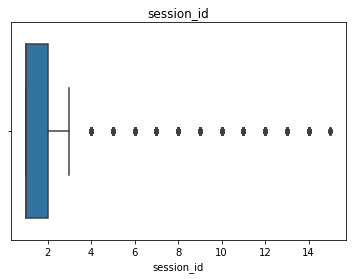

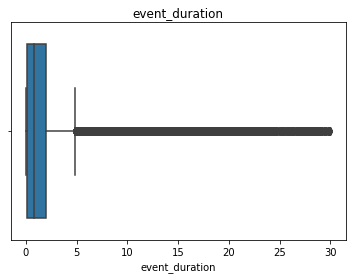

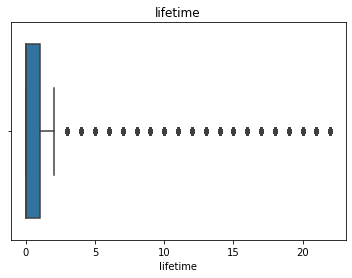

In [43]:
# взглянем на ящик с усами, чтобы выявить выбросы

col= ['session_id', 'event_duration', 'lifetime']

for i in col:
    sns.boxplot(data=user_profiles, x=i)
    plt.title(i)
    plt.show()

Несмотря на то, что диаграмма размаха выявляет выбросы, я предлагаю больше не удалять. От самых явных мы избавились избавились. А эти выбросы выглядят более реалестичнее.

In [44]:
# выведем таблицу с профилями пользователей и общую информацию о ней

display(user_profiles.head(10), user_profiles.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60678 entries, 0 to 72600
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   user_id         60678 non-null  object        
 1   good_user       60678 non-null  int64         
 2   first_ts        60678 non-null  datetime64[ns]
 3   first_date      60678 non-null  object        
 4   session_id      60678 non-null  int64         
 5   event_dt        60678 non-null  datetime64[ns]
 6   event_date      60678 non-null  object        
 7   event_time      60678 non-null  object        
 8   event_name      60678 non-null  object        
 9   event_duration  60678 non-null  float64       
 10  source          60678 non-null  object        
 11  lifetime        60678 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(3), object(6)
memory usage: 6.0+ MB


,user_id,good_user,first_ts,first_date,session_id,event_dt,event_date,event_time,event_name,event_duration,source,lifetime
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,0,2019-10-07 13:39:45,2019-10-07,1,2019-10-07 13:39:45,2019-10-07,13:39:45,tips_show,0.00,other,0
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,0,2019-10-07 13:39:45,2019-10-07,1,2019-10-07 13:40:31,2019-10-07,13:40:31,tips_show,0.77,other,0
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,0,2019-10-07 13:39:45,2019-10-07,1,2019-10-07 13:41:05,2019-10-07,13:41:05,tips_show,0.57,other,0
3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,0,2019-10-07 13:39:45,2019-10-07,1,2019-10-07 13:43:20,2019-10-07,13:43:20,tips_show,2.25,other,0
4,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,0,2019-10-07 13:39:45,2019-10-07,1,2019-10-07 13:45:30,2019-10-07,13:45:30,tips_show,2.17,other,0
5,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,0,2019-10-07 13:39:45,2019-10-07,1,2019-10-07 13:45:43,2019-10-07,13:45:43,tips_show,0.22,other,0
6,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,0,2019-10-07 13:39:45,2019-10-07,1,2019-10-07 13:46:31,2019-10-07,13:46:31,tips_show,0.80,other,0
7,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,0,2019-10-07 13:39:45,2019-10-07,1,2019-10-07 13:47:32,2019-10-07,13:47:32,tips_show,1.02,other,0
8,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,0,2019-10-07 13:39:45,2019-10-07,1,2019-10-07 13:49:41,2019-10-07,13:49:41,tips_show,2.15,other,0
9,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,0,2019-10-07 13:39:45,2019-10-07,2,2019-10-09 18:33:55,2019-10-09,18:33:55,map,0.00,other,2


None

Мы видим, что пропущенных значений у нас нет, да и типы данных в столбцах нам подходят. Также по датасету расположение столбцов стало удобнее для анализа.

**Наш датасет с профилями пользователя готов, теперь мы можем перейти к исследованию взаимодействия пользывателей с нашим мобильным приложением!**

<a id='3_3'></id>

## [3.3: Изучение источников](#content)


В нашем исследовании есть всего 3 источника, давайте узнаем какой из них привлек больше всего пользователей совершивших наше целевое действие и тем самым узнаем какой из источников эффективнее.

In [45]:
# напишем функцию для построения диаграммы

def barplot(data, x, y, hue=False, group=None):
    
    plt.figure(figsize=(12,5))
    
    if hue == False:
        ax = sns.barplot(data=data, x=x, y=y)
    else:
        ax = sns.barplot(data=data, x=x, y=y, hue=group)
    
    
        
    

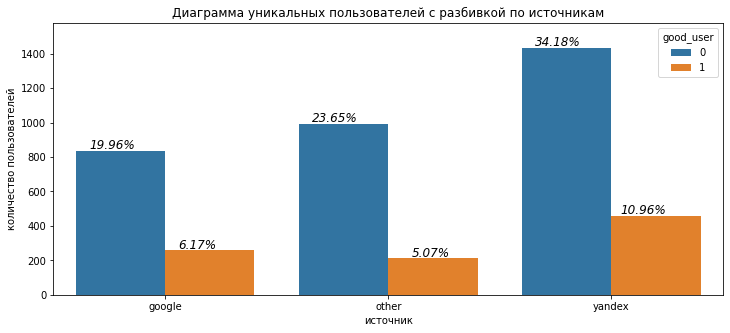

In [46]:
# построим диаграмму пользователей с разбивкой по источникам и целевому событию

data = user_profiles.groupby(['source', 'good_user'], as_index=False).agg({'user_id': 'nunique'})

# добавим столбец с процентами, чтобы подписать бары 
data['prc'] = data['user_id'].apply(lambda x: str(round(x / data['user_id'].sum() * 100, 2)) + '%' )


barplot(data, 'source', 'user_id', hue=True, group='good_user')


plt.title('Диаграмма уникальных пользователей с разбивкой по источникам')
plt.xlabel('источник')
plt.ylabel('количество пользователей')
plt.ylim(0, data['user_id'].max() * 1.1)

ind=[-0.5, .3, 1.6, 2.5, 3.7, 4.5]    # вручную проставил метуи по оси х, потому что использовали группировку hue 
n=0
for index, row in data.iterrows():
    plt.text(ind[n] / 2.1, row[2] + 10, row[3], ha='center', style='italic', fontsize=12 )
    n +=1

plt.show()

Yandex показывает себя лучше остальных, он привлек больше всего пользователей и конверсия в просмотры контакта у них выше, чем у остальных источников. Также можем заметить, что у нас общая конверсия в просмотры среди пользователей составляет около 20%.

Всего у Yandex около 45% всех привлеченных пользователей.

Перед тем как двигаться дальше, давайте еще изучим конверсию в просмотры в самих источниках. 

In [47]:
# добавим столбец total в котором посчитаем сколько пользователей привел каждый из источников

source = data['source'].unique()
data['total'] = 0

for value in source:
    data.loc[ data.source == value, 'total'] = data.loc[ data.source == value, 'user_id'].sum()

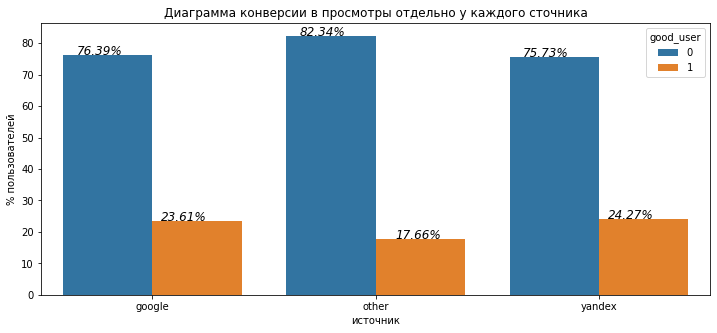

In [48]:
# добавим столбец с конверсией источника

data['prc_source'] = round((data['user_id'] / data['total'] * 100), 2)

barplot(data, 'source', 'prc_source', hue=True, group='good_user')

ind=[-0.5, .3, 1.6, 2.5, 3.7, 4.5]    # вручную проставил метуи по оси х, потому что использовали группировку hue 
n=0

for index, row in data.iterrows():
    plt.text(ind[n] / 2.1, row[5] , str(row[5]) + '%', ha='center', style='italic', fontsize=12 )
    n +=1

plt.title('Диаграмма конверсии в просмотры отдельно у каждого сточника')
plt.xlabel('источник')
plt.ylabel('% пользователей');


Если посмотреть на диаграмму, то мы видем, что конверсия в просмотры у Google и Yandex примерно одинаковая и составляет около 24%. Да, выше мы отметили, что Yandex привлек больше пользователей, но теперь мы не можем сказать, что Google хуже конвертирует пользователей в просмотры. Поскольку нам ничего не известно о затратах на рекламу, мы можем лишь отметить что Google имеют схожую конверсию в просмотры от числа привлеченных пользователей с Yandex.

Но, давайте еще на всякий случай проверим даты привлечения пользователей у разных источников. Возможно какие-то из источников привлекали пользователей дольше - это может объяснить почему Yandex привлек больше пользователей, чем другие.

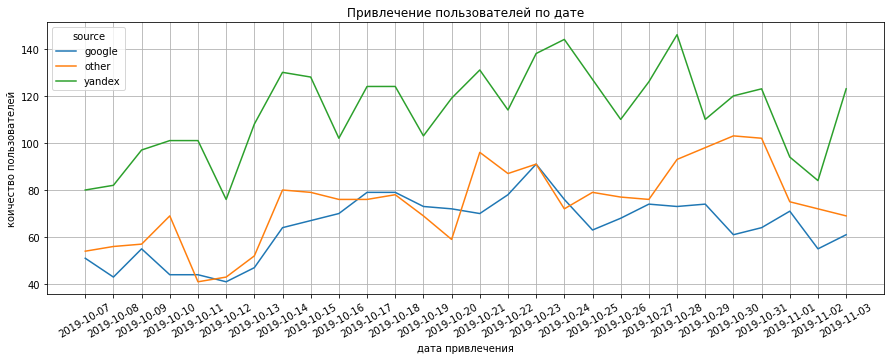

In [49]:
# построим диаграмму привлечения пользователей из разных источников с группировкой по дате


data = user_profiles.groupby(['event_date', 'source'], as_index=False).agg({'user_id': 'nunique'})

plt.figure(figsize=(15,5))
sns.lineplot(data=data, x='event_date', y='user_id', hue='source')

plt.title('Привлечение пользователей по дате')
plt.xlabel('дата привлечения')
plt.ylabel('коичество пользователей')

plt.xticks(ticks=data['event_date'].unique(), rotation=30)

plt.grid();

Наше предположение: что некоторые источники дольше привлекали пользователей - не оправдалась. 


Можем лишь сказать, что Yandex за время исследования привлекал больше пользователей, а Google меньше всего. 
Конверсия в просмотры из общего количества лучше всего у Yandex - около 11%, а у Google и других источников около 6%.

Если рассматривать конверсию в просмотры с разбивкой по источников: тут Yandex и Google сравнялись и у них у каждого около 24% от привлеченных ими пользователей. 

<a id='3_4'></id>

## [3.4: Изучение времени сессий](#content)


Ранее мы добавили столбцы `session_id` и `event_duration`: номер сессии мы присваивали каждому пользывателю свой и он начинается с 1 и до последнего использывания. Еще если время между действиями превышает 30 минут, то пользывателю мы присваивали следующий порядковый номер сессии. Также мы расчитали время между действиями. 

Изучим количество сессий у пользывателей, их длительность и среднию конверсию в просмотры.

In [50]:
# создадим таблицу, куда войдут данные для исследования
# рассчитаем для каждой сессиии:
# количество уникальных пользователей
# конверсию в просмотры
# количество уникальных действий
# общую длительность сессии
# максимальный лайфтайм






data = (
    user_profiles.groupby('session_id', as_index=False)
    .agg(
        {
            'user_id': 'nunique',
            'good_user': 'mean',
            'event_name': 'count',
            'event_duration': 'mean',
            'lifetime': 'max'
        })
    .rename(columns=
            {
                'user_id': 'count_user',
                'good_user': 'conversion',
                'event_name': 'count_event',
                'event_duration': 'mean_duration',
                'lifetime': 'max_lifetime'
            })
    
)

In [51]:
# выведем на экран получившуюся таблицу

data

,session_id,count_user,conversion,count_event,mean_duration,max_lifetime
0,1,4198,0.229653,35497,1.769065,22
1,2,1878,0.310206,11386,1.969282,22
2,3,1001,0.472980,5459,1.864515,22
3,4,555,0.463289,2901,1.923854,22
4,5,334,0.530220,1820,1.984269,22
5,6,228,0.669218,1176,2.352755,21
6,7,157,0.574440,759,2.002543,22
7,8,108,0.613909,417,2.125875,21
8,9,78,0.577031,357,1.831681,21
9,10,57,0.628070,285,2.008175,21


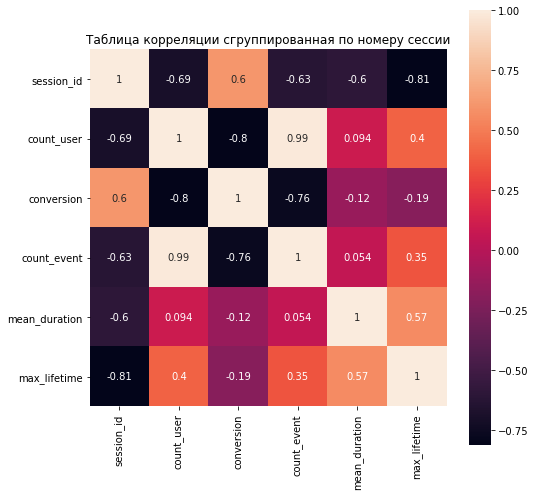

In [52]:
# изучим корреляцию

corr = data.corr()

plt.figure(figsize=(8,8))
sns.heatmap(corr, annot=True, square=True)

plt.title('Таблица корреляции сгруппированная по номеру сессии');

Видим положительную корреляцию сессий к конверсии в просмотры, и отрицательную корреляцию по всем остальным признакам.

Можем отметить очень сильную отрицательную корреляцию максимальной сессии к максимальному лайфтайму.

В основном все остальные данные смотрятся логично:
 - чем больше пользователь совершает сессий - тем выше конверсия в просмотры,
 - также уменьшается лайфтайм, потому что подходит к концу период исследования.

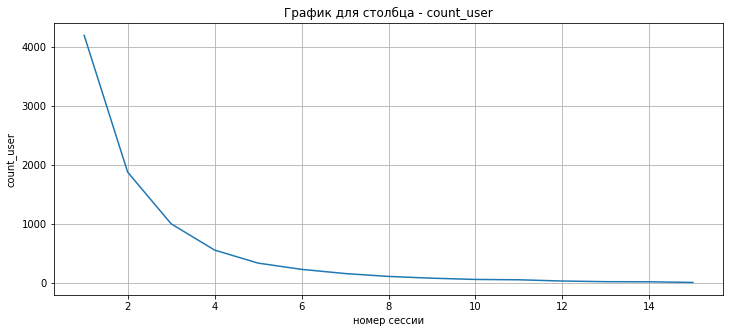

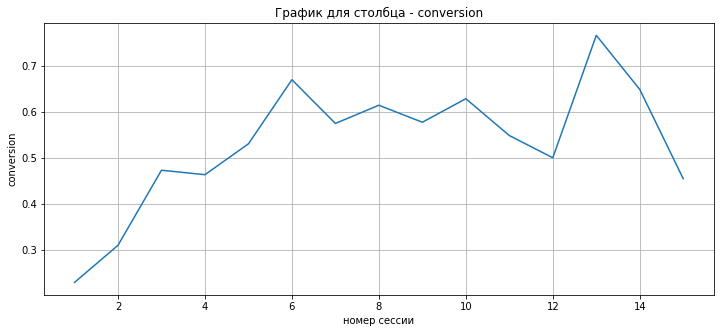

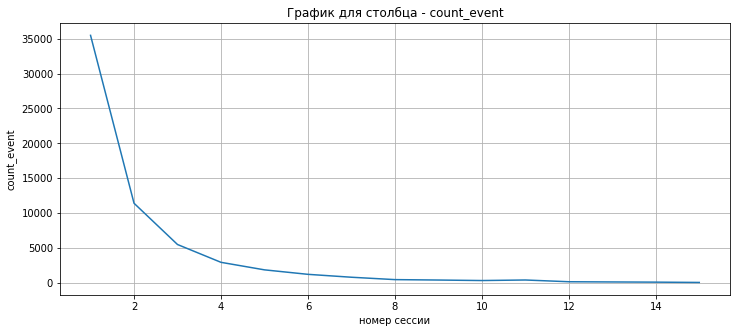

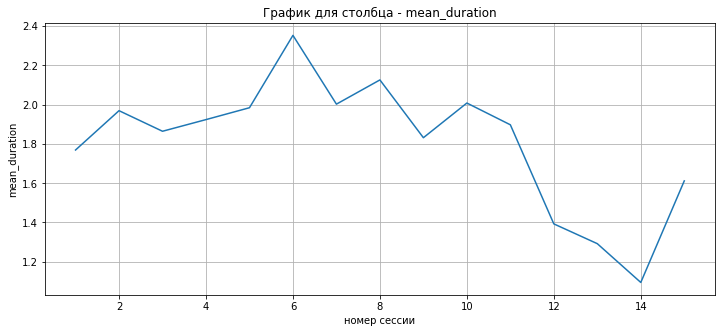

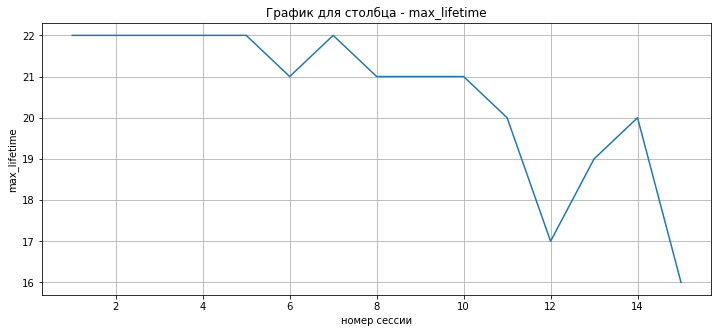

In [53]:
# построим графики на которых изучим сесии с другими значениями столбцов

columns = data.drop(columns=['session_id']).columns

for col in columns:
    
    plt.figure(figsize=(12,5))
    
    sns.lineplot(data=data, x='session_id', y=col)
    
    plt.title(f'График для столбца - {col}')
    plt.xlabel('номер сессии')
    plt.grid()
    
    plt.show();

**Мы видим:**
 - около 50% всех пользователей совершают не более 2-х сессий, еще около 20-30%% пользователей хватает на 4 сессии - причем в эти сессии наименьшая конверсия в просмотры. Очень много пользователей не возвращаются после 4 сессии;
 - наибольшая конверсия на 6 и 14 сессии - но опять же здесь стоит отметить, что в эти сессии остается очень мало пользователей;
 - количество действий  снижается прямо пропорционально количеству пользователей;
 - средняя продолжительность увеличивается до 6 сессии, а затем снижается;
 - после 7 сессии лайфтайм пользователей начинает снижаться.

<a id='3_5'></id>

## [3.5: Изучение видов действий пользователей](#content)


Перед исследованием видов действия пользователей, давайте вспомним их:

**Виды действий:**

- `advert_open` — открыл карточки объявления,
- `photos_show` — просмотрел фотографий в объявлении,
- `tips_show` — увидел рекомендованные объявления,
- `tips_click` — кликнул по рекомендованному объявлению,
- `contacts_show` — посмотрел номер телефона, **целевое событие**,
- `contacts_call` — позвонил по номеру из объявления,
- `map` — открыл карту объявлений,
- `search` — разные действия, связанные с поиском по сайту,
- `favorites_add` — добавил объявление в избранное.


Давайте изучим следующие параметры:
 - количество пользователей совершивших каждое действие,
 - продолжительность этих действий,
 - влияет ли количество совершенных действий от сессии.

In [54]:
# построим таблицу с параметрами для видов дейсвий
# узнаем:
# количество пользователей совершивших действия с разбивкой на совершивших целевое событие или нет
# длительность этих действий
# как сессии влияют на действия

data = (
    user_profiles.groupby(['good_user', 'event_name'], as_index=False)
    .agg(
        {
            'user_id': 'nunique',
            'session_id': 'mean',
            'event_duration': 'mean',
            'lifetime': 'mean'
            
        })
    .rename(columns=
            {
                'user_id': 'count_user',
                'session_id': 'mean_session',
                'event_duration': 'mean_event_duration',
                'lifetime': 'mean_lifetime'
            })
)


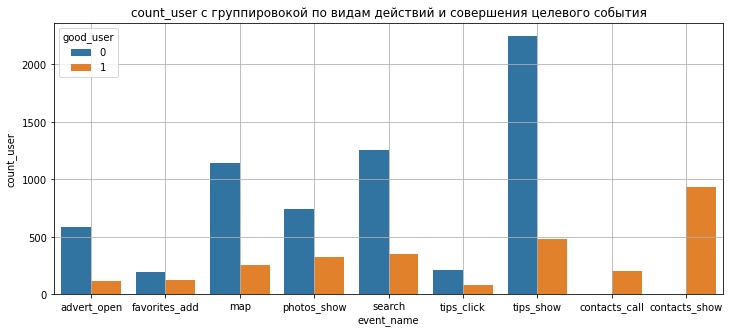

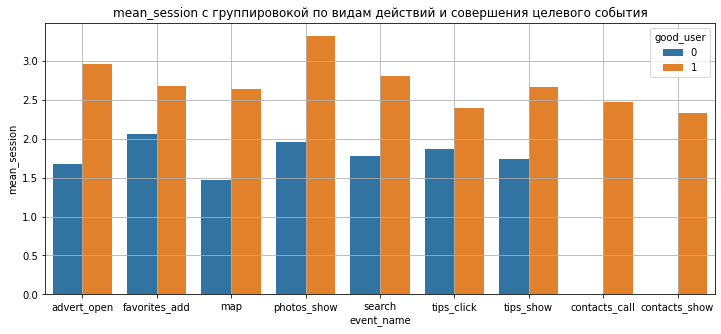

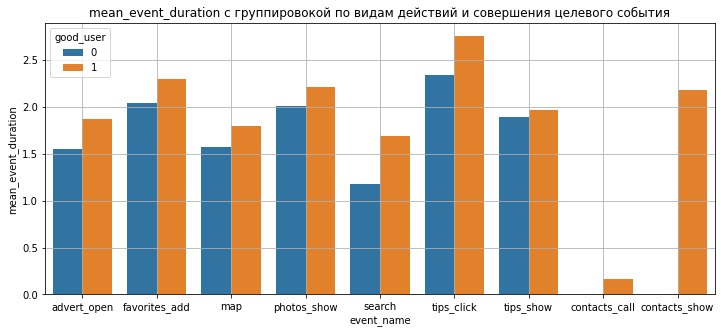

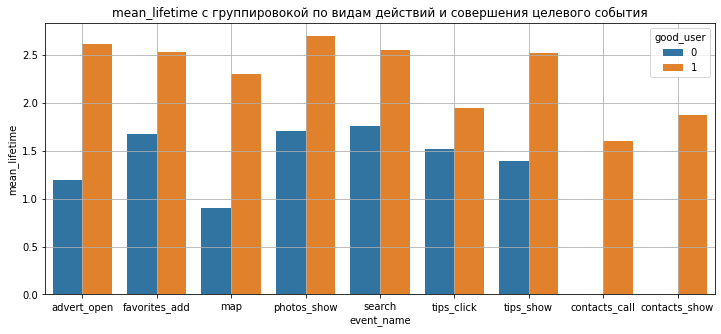

In [55]:
# изучим средние параметры у видов действия, построим графики

columns = data.drop(columns=['good_user', 'event_name'])

for col in columns:
    
    barplot(data, 'event_name', col, hue=True, group='good_user')
    
    plt.title(f'{col} с группировокой по видам действий и совершения целевого события')
    plt.grid()

**Мы видим:**
 - у пользователей совершаемых целевое событие - просмотр контакта - выше среднее количество сессиий и находятся в диапазоне от 2 до 3 сессий,
 - средняя продолжительноть всех действий у целевых пользователей выше. Самую большую протяженность в среднем это просмотр карты объявлений,
 - лайфтайм целевых пользователей выше и находится в диапазоне от 2 до 3 примерно,
 - если смотреть на число уникальных пользователей, то здесь выигрывает нецелевая подгруппа пользователей, которая совершила рекордно много действия - увидеть рекомендательные объявления.

<a id='3_6'></id>

## [3.6: Построение и анализ воронок и конверсий](#content)


Чуть ранее при изучении действий мы можем увидеть большое количество уникальных пользователей у целевого события - просмотр контактов - это количество больше чем любое из других действий и это может говорить только о том, что у нас есть разные воронки для целевого события.

Для изучения воронок и правильного анализа я предлагаю добавить еще 1 столбец, в котором мы будет отмечать сессии в которых произошло целевое событие - просмотр контакта. Ранее мы уже отметили пользователей, но далеко не все сессии у целевых пользователей заканчивались целевым событием и чтобы исключить такую погрешность **мы будем ориентироваться не на пользователей, а на сессии.**


Добавим столбец **good_session** в котрой True или 1 - будет означать, что данная сессия затронула или закончилась целевым событием - просмотр контакта. 


In [56]:
# добавим столбец good_session и сразу присвоим ему 0

user_profiles['good_session'] = 0

In [57]:
# присвоим значение True там где действие - просмотр контакта

user_profiles.loc[ (user_profiles.event_name == 'contacts_show'), 'good_session'] = 1

In [58]:
# создадим список пользователей, даты и номера сессии в которых было целевое действие

good_session = user_profiles.query('good_session == 1')[['user_id', 'event_date', 'session_id']]

In [59]:
# удалим дубликаты
good_session.drop_duplicates(inplace=True)

# отсортируем
good_session.sort_values(['user_id', 'event_date', 'session_id'], inplace=True)

# выведем на экран
good_session

,user_id,event_date,session_id
50,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-20,2
78,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-29,4
99,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-30,5
105,00157779-810c-4498-9e05-a1e9e3cedf93,2019-11-03,6
148,00551e79-152e-4441-9cf7-565d7eb04090,2019-10-25,1
...,...,...,...
72165,fdd232f5-962d-4eed-ac02-f0141385cc8f,2019-10-11,7
72405,fee3ba1c-16f4-46f7-bf56-4bf80cc4e2f5,2019-10-26,1
72488,ff1554b5-919e-40b1-90bb-ee1f7f6d5846,2019-10-21,2
72585,ffc01466-fdb1-4460-ae94-e800f52eb136,2019-10-07,1


In [60]:
# поставим сессиям в которох было целевое действие значение True 

for index, column in good_session.iterrows():
   
    user_profiles.loc[ (user_profiles.user_id == column[0]) 
                  & (user_profiles.event_date == column[1])
                  & (user_profiles.session_id == column[2]),
                  'good_session'
                 ] = 1

In [61]:
# нам надо проверить много строк, поэтому включим опцию
pd.set_option('display.max_rows', None)




# проверим наши расчеты сделаем срез данных и посмотрим на данные действий
# по логике в good_session не должно быть целевых действий действий - просмотр контактов 

print('Группировка по целевому действию и просмотр минимальной длительности действия')
user_profiles.groupby(['good_session', 'session_id', 'event_name']).agg(
    {
        'event_name': 'count',
        'event_duration': 'min'
    })
       

Группировка по целевому действию и просмотр минимальной длительности действия


event_name  event_duration
good_session session_id event_name                               
0            1          advert_open          2705            0.00
                        favorites_add         485            0.00
                        map                  1861            0.00
                        photos_show          3754            0.00
                        search               3050            0.00
                        tips_click            289            0.00
                        tips_show           16788            0.00
             2          advert_open           641            0.00
                        favorites_add         210            0.00
                        map                   450            0.00
                        photos_show          1284            0.00
                        search                910            0.00
                        tips_click            156            0.00
                        tips_show            5422            0.00
             3          advert_open           248            0.00
                        favorites_add         104            0.00
                        map                   167            0.00
                        photos_show           576            0.00
                        search                442            0.00
                        tips_click             62            0.00
                        tips_show            2238            0.00
             4          advert_open           221            0.00
                        favorites_add          34            0.00
                        map                   102            0.00
                        photos_show           331            0.00
                        search                252            0.00
                        tips_click             37            0.00
                        tips_show            1309            0.00
             5          advert_open            61            0.00
                        favorites_add          19            0.00
                        map                    36            0.00
                        photos_show           199            0.00
                        search                141            0.00
                        tips_click             22            0.00
                        tips_show             762            0.00
             6          advert_open            37            0.00
                        favorites_add          25            0.00
                        map                    23            0.00
                        photos_show           187            0.00
                        search                101            0.00
                        tips_click              5            0.12
                        tips_show             370            0.00
             7          advert_open            41            0.00
                        favorites_add          11            0.13
                        map                    19            0.00
                        photos_show           157            0.00
                        search                 62            0.00
                        tips_click              4            0.00
                        tips_show             280            0.00
             8          advert_open            16            0.00
                        favorites_add           8            0.00
                        map                     7            0.00
                        photos_show            95            0.00
                        search                 48            0.00
                        tips_click              7            0.57
                        tips_show             147            0.00
             9          advert_open            21            0.00
                        favorites_add          12            0.00
                        map                    13            0.00
             

In [62]:
# посмотрим на максимальнe. продолжительность 

print('Группировка по целевому действию и просмотр минимальной длительности действия')
user_profiles.groupby(['good_session', 'session_id', 'event_name']).agg(
    {
        'event_name': 'count',
        'event_duration': 'max'
    })
       

Группировка по целевому действию и просмотр минимальной длительности действия


event_name  event_duration
good_session session_id event_name                               
0            1          advert_open          2705           28.95
                        favorites_add         485           29.37
                        map                  1861           29.48
                        photos_show          3754           29.97
                        search               3050           28.97
                        tips_click            289           26.17
                        tips_show           16788           30.00
             2          advert_open           641           21.65
                        favorites_add         210           24.08
                        map                   450           29.90
                        photos_show          1284           29.90
                        search                910           28.90
                        tips_click            156           23.65
                        tips_show            5422           29.73
             3          advert_open           248           26.95
                        favorites_add         104           22.77
                        map                   167           21.10
                        photos_show           576           27.20
                        search                442           29.68
                        tips_click             62           24.33
                        tips_show            2238           29.12
             4          advert_open           221           21.27
                        favorites_add          34           10.28
                        map                   102           28.25
                        photos_show           331           29.40
                        search                252           28.13
                        tips_click             37           15.23
                        tips_show            1309           29.95
             5          advert_open            61           22.87
                        favorites_add          19            6.93
                        map                    36           17.02
                        photos_show           199           22.95
                        search                141           23.58
                        tips_click             22           13.70
                        tips_show             762           29.32
             6          advert_open            37            8.38
                        favorites_add          25            8.53
                        map                    23           24.42
                        photos_show           187           28.60
                        search                101           20.77
                        tips_click              5            1.05
                        tips_show             370           27.22
             7          advert_open            41           13.07
                        favorites_add          11           14.57
                        map                    19            3.93
                        photos_show           157           27.02
                        search                 62           24.65
                        tips_click              4            2.40
                        tips_show             280           30.00
             8          advert_open            16            7.33
                        favorites_add           8            5.92
                        map                     7            0.97
                        photos_show            95           28.77
                        search                 48            8.05
                        tips_click              7            5.73
                        tips_show             147           26.75
             9          advert_open            21            8.82
                        favorites_add          12           23.25
                        map                    13           13.97
             

Всё кажется правильно распределилось.

Смущает из двух таблиц - это слишком маленькая длительность у целевого события - 0,2 минуты или 12 секунд. Хотя может пользователь записывает себе контакты, а потом уже обзванивает или добавляет в избраное. В общем будем считать это нормальным показателем.

In [63]:
# давайте отключим опцию, которая показывает все строки, чтобы она нам вдальнейшем не мешала исследовани.

pd.reset_option('display.max_rows')

Мы создали новый столбец **good_session** в котором отметили все сессии в которых происходило целевое событие - просмотр контакта.


**Давайте изучим действия с группировкой по сессиям** - ранее мы обратили внимание, что воронки до целевого события - просмотр контакта - могут различаться, нам нужно определить какие виды вороном могут привести к целевому действию и проанализировать их.


**Мы имеем:**
 - разделение на `хорошие` и `плохие` сессии,
 - разделение на сессии,
 - длительность действий,
 - количество пользывателей.
 
Думаю - этого достаточно, чтобы попробывать предположить различные вариации воронок до целевого события - просмотр контакта.

In [64]:
# для построение воронок изучим пути пользователей

# создадим новый датафрейм, куда попадут пользователи совершившие целевое событие - просмотр контактов
# для изучения воронок нам не потребуются все столбцы, удалим лишние
data = user_profiles[['user_id', 'session_id', 'event_dt', 'event_name']]

# отсортируем получившийся датафрейм
data.sort_values(['user_id', 'session_id', 'event_dt'], inplace=True)


In [65]:
# поставим рангам все события которые совершал пользователь
# ранг будет обнуляться с новым пользователем, новой сессией или новым действием, которое совершает пользователь

data['user_path'] = data.groupby(['user_id', 'session_id', 'event_name']).rank(method='first')

In [66]:
# теперь когда новое действие пользователя начиначется с 1-го ранка, мы можем избавится от повторяющихся друг
# за другом одних и тех же действий, это нам облегчит в построении воронок

data = data.query('user_path == 1')

In [67]:
# теперь когда у нас в датафрейме нет идущих kheu за другом одинаковых действий
# давайте переназначем ранги и пускай они идут по шагам пользователя
# ранги будут обнулятся с начала новой сессии и с новым пользователем

data['user_path'] = data.groupby(['user_id', 'session_id']).rank(method='first')

In [68]:
# выведем получимшийся датафрем

data.head(10)

,user_id,session_id,event_dt,event_name,user_path
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1,2019-10-07 13:39:45,tips_show,1.0
9,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2,2019-10-09 18:33:55,map,1.0
11,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2,2019-10-09 18:40:28,tips_show,2.0
13,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,3,2019-10-21 19:52:30,tips_show,1.0
15,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,3,2019-10-21 19:53:38,map,2.0
27,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,4,2019-10-22 11:18:14,map,1.0
28,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,4,2019-10-22 11:19:10,tips_show,2.0
35,00157779-810c-4498-9e05-a1e9e3cedf93,1,2019-10-19 21:34:33,search,1.0
38,00157779-810c-4498-9e05-a1e9e3cedf93,1,2019-10-19 21:40:38,photos_show,2.0
44,00157779-810c-4498-9e05-a1e9e3cedf93,2,2019-10-20 18:49:24,search,1.0


Мы создали новый датафрейм **data**, в котором сделали следующее:
- сгруппировали пользователей по сессиям;
- убрали идущие друг за другом одни и теже действия, которые происходили за одну сессию;
- добавили порядковые номера действиям пользователя, которые нам теперь позволят отследить их шаги и спроектировать воронки.


Давайте предположим, какие воронки могут быть у нас, построим диаграмму с медианой (чтобы не учитывать выбросы) значения "шага" пользователя, чем это значение меньше - тем больше вероятность, что бользователь совершал эти действия сперва. Это поможет нам сформировать воронки для дальнейшего анализа.

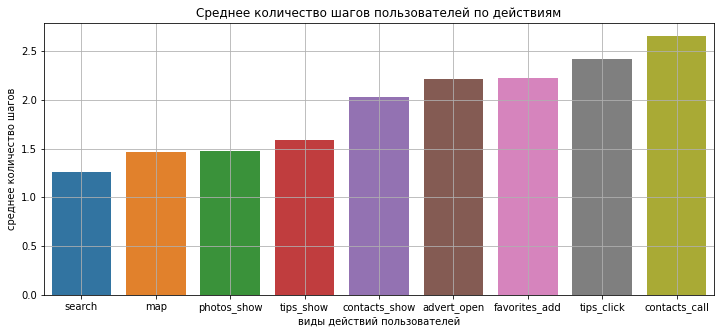

In [69]:
# расчитаем сколько пользователи "шагают" по разным действиям
# чем меньше шаг, тем раньше пользователь начинает это действий

report = (
    data
    .groupby(['user_id', 'event_name'], as_index=False)
    .agg({'user_path': 'median'})
    .groupby('event_name', as_index=False)['user_path'].mean()
    .sort_values('user_path')
    
)

# создадим график со среднем количество шагов действий
barplot(report, 'event_name', 'user_path')

plt.title('Среднее количество шагов пользователей по действиям')
plt.xlabel('виды действий пользователей')
plt.ylabel('среднее количество шагов')

plt.grid();

Теперь по графику мы предположить воронку к событий - просмотр контактов.


**Вспомним, какие виды действий у нас есть:**

- `advert_open` — открыл карточки объявления,
- `photos_show` — просмотрел фотографий в объявлении,
- `tips_show` — увидел рекомендованные объявления,
- `tips_click` — кликнул по рекомендованному объявлению,
- `contacts_show` — посмотрел номер телефона,
- `contacts_call` — позвонил по номеру из объявления,
- `map` — открыл карту объявлений,
- `search` — разные действия, связанные с поиском по сайту,
- `favorites_add` — добавил объявление в избранное.


**Предпологаемые воронки:**

- **Воронка №1**:
 - `search` — разные действия, связанные с поиском по сайту
 - `advert_open` — открыл карточки объявления
 - `photos_show` — просмотрел фотографий в объявлении
 - `contacts_show` — посмотрел номер телефона
 
- **Воронка №2**:
 - `map` — открыл карту объявлений
 - `advert_open` — открыл карточки объявления
 - `photos_show` — просмотрел фотографий в объявлении
 - `contacts_show` — посмотрел номер телефона
 
- **Воронка №3**:
 - `tips_show` — увидел рекомендованные объявления
 - `tips_click` — кликнул по рекомендованному объявлению
 - `photos_show` — просмотрел фотографий в объявлении
 - `contacts_show` — посмотрел номер телефона
 
 
Далее будем проводить исследование по этим предпологаемым воронкам.

In [70]:
# создадим 1-ю воронку

funnel_one = (
    data.loc[ 
        ((data.event_name == 'search') & (data.user_path == 1)) |
        ((data.event_name == 'advert_open') & (data.user_path == 2)) |
        ((data.event_name == 'photos_show') & (data.user_path == 3)) |
        ((data.event_name == 'contacts_show') & (data.user_path == 4)) 
        
    ])

In [71]:
# создадим 2-ю воронку

funnel_two = (
    data.loc[ 
        ((data.event_name == 'map') & (data.user_path == 1)) |
        ((data.event_name == 'advert_open') & (data.user_path == 2)) |
        ((data.event_name == 'photos_show') & (data.user_path == 3)) |
        ((data.event_name == 'contacts_show') & (data.user_path == 4)) 
        
    ])

In [72]:
# создадим 3-ю воронку

funnel_three = (
    data.loc[ 
        ((data.event_name == 'tips_show') & (data.user_path == 1)) |
        ((data.event_name == 'tips_click') & (data.user_path == 2)) |
        ((data.event_name == 'photos_show') & (data.user_path == 3)) |
        ((data.event_name == 'contacts_show') & (data.user_path == 4))
    ])

In [73]:
# добавим столбец с продолжительностью действий
# считать будем для каждого пользователя отдельно + сессия более 30 минут обнуляет счетчик

funnel = [funnel_one, funnel_two, funnel_three]
for df in funnel:
    df['event_duration']  = df.groupby(['user_id', 'session_id'])['event_dt'].diff()


# переведем действия в минуты и округлим до десятичных

    df['event_duration']  = (df['event_duration'].map(
            lambda x: round( (x.total_seconds() / 60), 2 ) ))
    
    df['event_duration'].fillna(0, inplace=True)



In [74]:
# сгруппируем все 3 воронки для подсчета конверсий

# первая воронка
group_funnel_one = (
    funnel_one
    .groupby('event_name', as_index=False)
    .agg({'user_id': 'nunique', 'event_duration': 'mean'})
    .sort_values('user_id', ascending=False)
    .rename(columns={'user_id': 'count_users'})
)


# вторая воронка 
group_funnel_two = (
    funnel_two
    .groupby('event_name', as_index=False)
    .agg({'user_id': 'nunique', 'event_duration': 'mean'})
    .sort_values('user_id', ascending=False)
    .rename(columns={'user_id': 'count_users'})
)


# третья воронка
group_funnel_three = (
    funnel_three
    .groupby('event_name', as_index=False)
    .agg({'user_id': 'nunique', 'event_duration': 'mean'})
    .sort_values('user_id', ascending=False)
    .rename(columns={'user_id': 'count_users'})
)

In [75]:
# напишем небольшую функцию для подсчета конверсии и конверсии в шаг

def conversion(data):
    
    data['conversion, %'] = data['count_users'].apply(
        lambda x: round(x / data['count_users'].max() * 100))
    
    data['conversion_for_step, %'] = round((data['count_users'] / data['count_users'].shift(1) * 100))
    data['conversion_for_step, %'].fillna(100, inplace=True)
    data['conversion_for_step, %'] = data['conversion_for_step, %'].astype('int')
    
    
        
            

In [76]:
# воспользуемся функцией и добавим столбцы с конверсией и конверсией в шаг

# для 1 воронки
conversion(group_funnel_one)

# для 2 воронки
conversion(group_funnel_two)

# для 3 воронки
conversion(group_funnel_three)

In [77]:
# сбросим индексы для барплода

group_funnel_one.reset_index(drop=True, inplace=True)
group_funnel_two.reset_index(drop=True, inplace=True)
group_funnel_three.reset_index(drop=True, inplace=True)

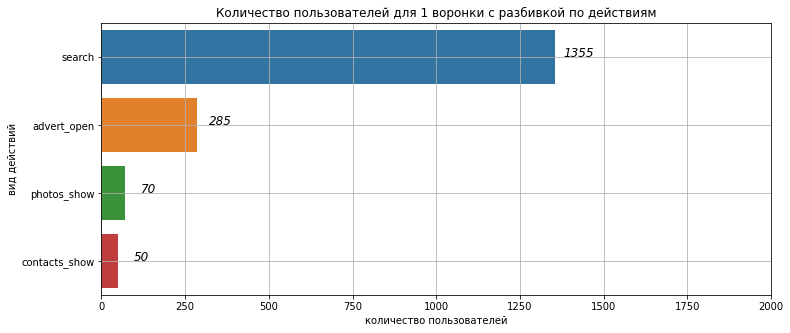

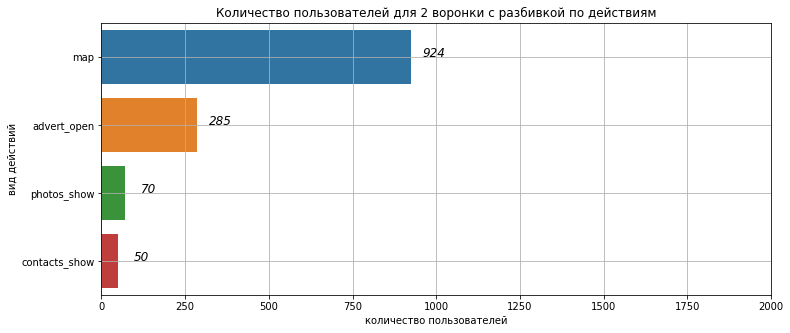

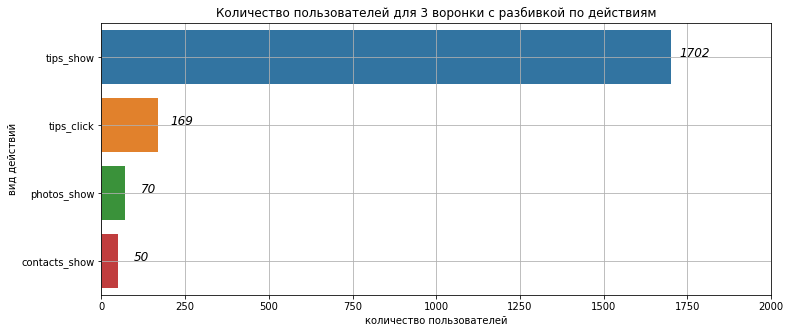

In [78]:
# построим диаграмму количество пользователей в наших воронках

funnel = [group_funnel_one, group_funnel_two, group_funnel_three]

n = 1

for fun in funnel:
    fig = barplot(fun, 'count_users', 'event_name')
    
    plt.title(f'Количество пользователей для {n} воронки с разбивкой по действиям')
    plt.xlabel('количество пользователей')
    plt.ylabel('вид действий')
    n += 1
    plt.xlim(0, 2000)
    plt.grid()
    
    for index, row in fun.iterrows():
        plt.text(row[1] + 70, index , row[1], ha='center', style='italic', fontsize=12 )
        
    

Много пользователей "теряется" после первого действия - причем на всех 3 воронках.

Если говорит о количестве, то тут лидирует воронка 3, у которой больше всего пользователей в самом начале.

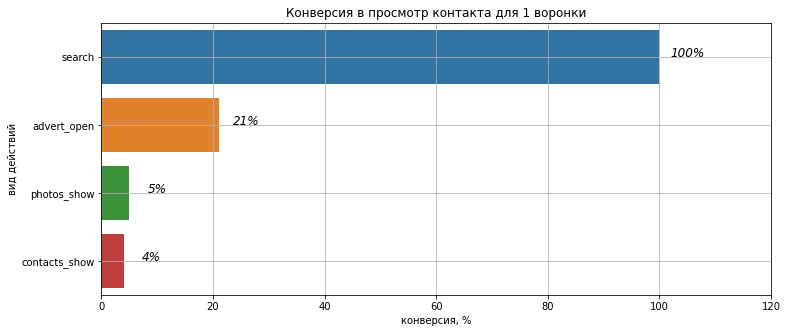

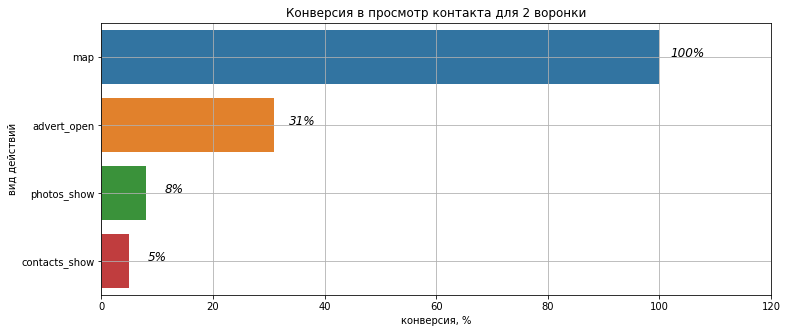

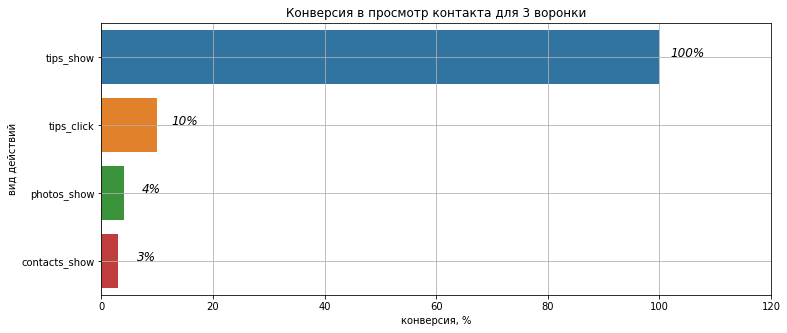

In [79]:
# построим диаграмму конверсий

funnel = [group_funnel_one, group_funnel_two, group_funnel_three]

n = 1

for fun in funnel:
    fig = barplot(fun, 'conversion, %', 'event_name')
    
    plt.title(f'Конверсия в просмотр контакта для {n} воронки')
    plt.xlabel('конверсия, %')
    plt.ylabel('вид действий')
    n += 1
    plt.xlim(0, 120)
    plt.grid()
    
    for index, row in fun.iterrows():
        text =  str(row[3]) + '%'
        plt.text(row[3] + 5, index , text, ha='center', style='italic', fontsize=12 )

У 2 воронке конверсия в просмотры лучше и составляет 5%, меньше всего у 3 воронке - 3%.

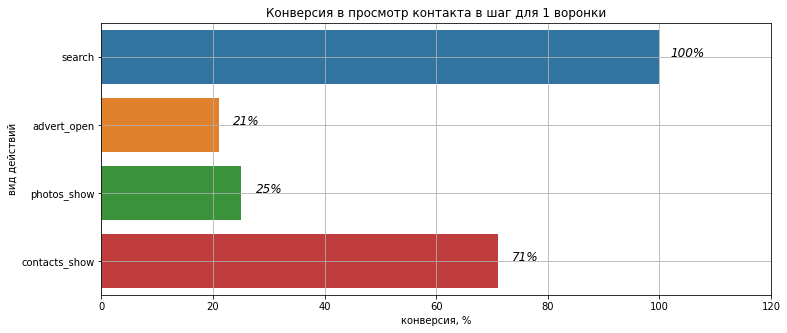

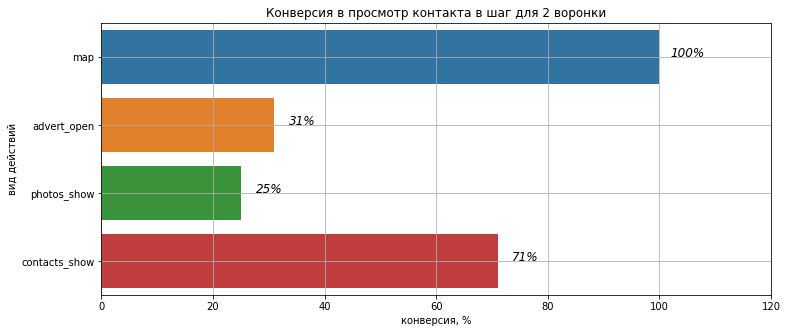

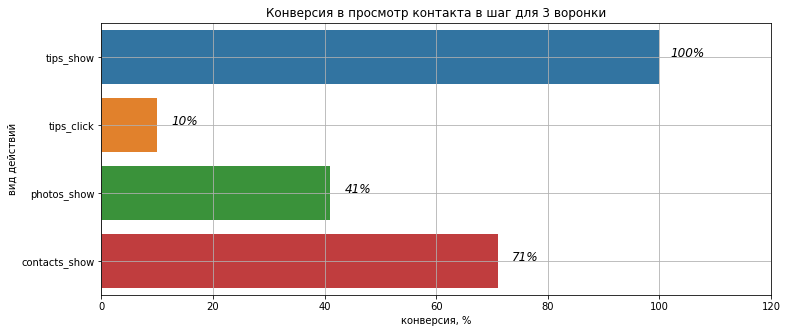

In [80]:
# построим диаграмму конверсий в шаг

funnel = [group_funnel_one, group_funnel_two, group_funnel_three]

n = 1

for fun in funnel:
    fig = barplot(fun, 'conversion_for_step, %', 'event_name')
    
    plt.title(f'Конверсия в просмотр контакта в шаг для {n} воронки')
    plt.xlabel('конверсия, %')
    plt.ylabel('вид действий')
    n += 1
    plt.xlim(0, 120)
    plt.grid()
    
    for index, row in fun.iterrows():
        text =  str(row[4]) + '%'
        plt.text(row[4] + 5, index , text, ha='center', style='italic', fontsize=12 )

Видим у всех трех воронок очень хорошую конверсию в шаг по отношению к целевому действию - 71%.


**Изучем сколько времени занимает путь до целевого события у наших воронок**

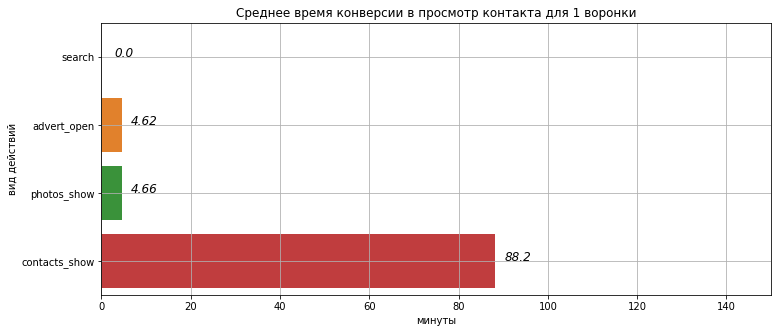

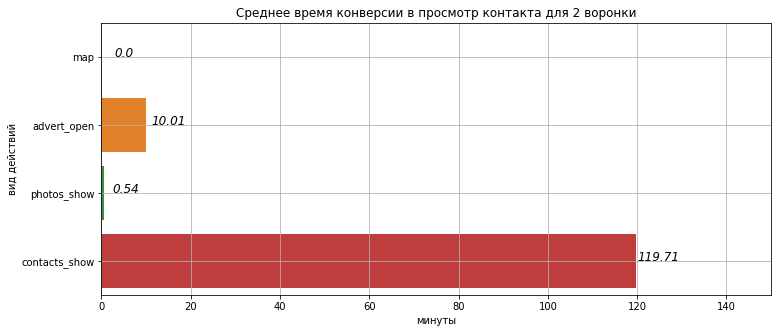

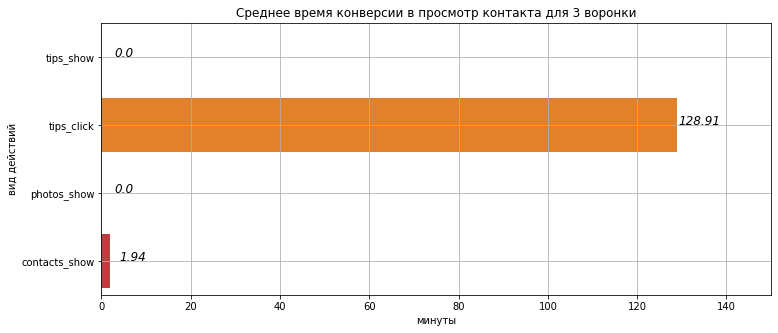

In [81]:
n = 1


for fun in funnel:
    fig = barplot(fun, 'event_duration', 'event_name')
    
    plt.title(f'Среднее время конверсии в просмотр контакта для {n} воронки')
    plt.xlabel('минуты')
    plt.ylabel('вид действий')
    n += 1
    plt.xlim(0, 150)
    plt.grid()
    
    for index, row in fun.iterrows():
        text =  round(row[2], 2)
        plt.text(row[2] + 5, index , text, ha='center', style='italic', fontsize=12 )



Меньше всего времени занимает у воронки 3, но мы помним, что там маленькая конверсия в просмотр контакта. Если смотреть на воронки 1 и 2, то 1 показывает себя быстрее примерно 90 минут против 120.

<a id='3_7'></id>

## [3.7: Вывод подраздела](#content)



**В ходе исследовательского анализа мы изучили:**

**1) Исследовали источников привлечения пользователей**
 - у нас есть 3 источника: Yandex, Google и другие. Лучше всех себя показывает Yandex, который привлек около 45% пользователей от общего количества, и 11% пользователей привлеченные Yandex хотя бы за 1 сессию совершили целевое событие - просмотр контакта.
 
 
 - Если посмотреть на диаграмму, то мы видем, что конверсия в просмотры у Google и Yandex примерно одинаковая и составляет около 24%. Да, выше мы отметили, что Yandex привлек больше пользователей, но теперь мы не можем сказать, что Google хуже конвертирует пользователей в просмотры. Поскольку нам ничего не известно о затратах на рекламу, мы можем лишь отметить что Google имеют схожую конверсию в просмотры от числа привлеченных пользователей.
 
 
**2) Исследование сессий пользователей** - здесь важно отметить, что действия пользователей мы поделили на сессии по следующим вритерием: если пользователь впервые зашел в мобильное приложениие - его сессия получает 1 номер, затем если между его действиями проходит более 30 минут, то его последующие действия получают следующий порядковый номер. Это индивидуально для каждого пользователя. 


 - около 50% всех пользователей совершают не более 2-х сессий, еще около 20-30%% пользователей хватает на 4 сессии - причем в эти сессии наименьшая конверсия в просмотры. Очень много пользователей не возвращаются после 4 сессии;
 
 
 - наибольшая конверсия на 6 и 14 сессии - но опять же здесь стоит отметить, что в эти сессии остается очень мало пользователей;
 
 
 - количество действий  снижается прямо пропорционально количеству пользователей;
 
 
 - а пот продолжительность действий постоянно растет, несмотря на то, что пользователей становится меньше. Видимо оставшиеся пользователи наиболее конвертируемые и их можно назвать "постоянными";
 
 
 - после 7 сессии лайфтайм пользователей начинает снижаться.
 
 
**3) Изучиние видов действия**
 - если взглянуть на количество уникальных пользователей с разбовкой на тех, кто хотя бы 1 раз совершал целеое событие и на тех, кто не совершал ниразу целевого события, мы можем увидеть следующее:
 
 
  - отчасти их взаимодействие с приложением проходит прямо пропорционально, за исключением целевого действия - просмотра контактов;
  
  
  - также здесь можно отметить, что наиболее популярное действие в обеих подгруппах - это `tips_show` - увидеть рекомендованные объявления, далее идет `search` — разные действия, связанные с поиском по сайту. Затем можно отметить сразу два действия: `map` — открыл карту объявлений или `photos_show` — просмотрел фотографий в объявлении;
  
  
  - также здесь можно обратить внимание на большое количество пользователей у целевого события - `contacts_show` — посмотрел номер телефона - это может быть связано с тем, что у нас нет определенной воронки к целевому событию.
  
  
  - если изучить количество действий совершенных по сессиям и взглянуть на средние показатели, то можно отметить, что целевые пользователи в среднем больше всего совершают действий между 2 и 3 сессиями. В то время, как пользователи не совершавшие целевого события в среднем совершают больше всего действий в 1 и 2 сессии. 
  
  
 - также можно отметить, что чаще всего во всех сессиях пользователи просматривают контакты.
 
 
  - если изучить среднею продолжительность действий, то у подгруппы пользователей совершивших хотя бы 1 раз целевое событие - оно выше по всем действиям;
  
  
 - здесь можно выделить большой разрыв между подгруппами пользователей при совершении действия `map` — открыл карту объявлений. Можно предположить, что чем дольше пользователь совершает это действие - тем больше шанс того, что он станет или уже есть целевой;
 
 
 - целевые пользователи поиском пользуются практически в 1,5 раза дольше чем нецелевые;
 
 
 - продолжительность действия `tips_click` — кликнул по рекомендованному объявлению - у нецелевых пользователей наименьшая.
 
 
  - взглянув на средние показатели лайфтайма пользователей и совершенных ими действий, можем отметить:
  
  
  - целевые пользователи чаще совершают действия в среднем на свой 2 лайфтайм или 3 день;
  
  
  - у нецелевых этот показатель в среднем равняется 1,5 - это говорит о том;
  
  
  - это говорит о том, что чем выше лайфтайм у пользователя, тем больше шанс того, что он станет или уже является целевым.
  
 
 
**4) Построение и изучение воронок**
 
 - Мы построили 3 воронки:
  - **Воронка №1**:
   - `search` — разные действия, связанные с поиском по сайту
   - `advert_open` — открыл карточки объявления
   - `photos_show` — просмотрел фотографий в объявлении
   - `contacts_show` — посмотрел номер телефона
 
- **Воронка №2**:
   - `map` — открыл карту объявлений
   - `advert_open` — открыл карточки объявления
   - `photos_show` — просмотрел фотографий в объявлении
   - `contacts_show` — посмотрел номер телефона
 
- **Воронка №3**:
   - `tips_show` — увидел рекомендованные объявления
   - `tips_click` — кликнул по рекомендованному объявлению
   - `photos_show` — просмотрел фотографий в объявлении
   - `contacts_show` — посмотрел номер телефона
   
   
Много пользователей "теряется" после первого действия - причем на всех 3 воронках.

Если говорит о количестве, то тут лидирует воронка 3, у которой больше всего пользователей в самом начале.

У 2 воронки конверсия в просмотры лучше и составляет 5%, меньше всего у 3 воронки - 3%.

Видим у всех трех воронок очень хорошую конверсию в шаг по отношению к целевому действию - 71%.

Меньше всего времени занимает у воронки 3, но мы помним, что там маленькая конверсия в просмотр контакта. Если смотреть на воронки 1 и 2, то 1 показывает себя быстрее примерно 90 минут против 120.

<a id='4'></id>

# [4: Проверка гипотез](#content)

Проверим две гипотезы:

 - **Гипотеза 1**: двухсторонняя
  - H0: нулевая гипотеза - Конверсия в просмотры контактов не различается у групп совершивших действия `tips_show` и `tips_click`, и групп совершивших только `tips_show`
  - Н1: альтернативная гипотеза - Конверсия в просмотры контактов различается у групп совершивших действия `tips_show` и `tips_click`, и групп совершивших только `tips_show`
  
  
  
 - **Гипотеза 2**: двухстороняя
  - Н0: нулевая гипотеза - Конверсия в просмотры у пользователей, чья сессия длится меньше 20 минут и пользователей, чья сессия длится более 20 минут не различается
  - Н1: альтернативная гипотеза - Конверсия в просмотры у пользователей, чья сессия длится меньше 20 минут и пользователей, чья сессия длится более 20 минут различается

<a id='4_1'></id>

## [4.1: Гипотеза №1: Конверсия в просмотры контактов различается у групп совершивших действия **tips_show и tips_click**, и групп совершивших только **tips_show**](#content)


- **Гипотеза 1**: двухсторонняя
  - H0: нулевая гипотеза - Конверсия в просмотры контактов не различается у групп совершивших действия `tips_show` и `tips_click`, и групп совершивших только `tips_show`
  - Н1: альтернативная гипотеза - Конверсия в просмотры контактов различается у групп совершивших действия `tips_show` и `tips_click`, и групп совершивших только `tips_show`
  
Создадим два датасета:
 - **group_A** - в которой хранятся данные пользователей совершивших действия `tips_show` и `tips_click`;
 - **group_B** - в которой хранятся данные пользователей совершивших действие `tips_show`.

In [82]:
# вычислим id пользователей совершавших оба действия

tips_show = pd.DataFrame(user_profiles.query('event_name == "tips_show"')['user_id'].unique()).drop_duplicates()
tips_click = pd.DataFrame(user_profiles.query('event_name == "tips_click"')['user_id'].unique()).drop_duplicates()

In [83]:
# проведем объеденение по inner - это поможет оставить только те id пользователей, которые совершали и то и то действие

tips_show_and_tips_click = tips_show.merge(tips_click, how='inner', on=0).drop_duplicates()

In [84]:
# знаю уникальные id пользователей добавим их в группы А или В


# пользователи которые совершали `tips_show` и `tips_click` - значит их уникальные id должны быть и там и там
group_A = data.query('user_id.isin(@tips_show_and_tips_click[0])')

# в группе В должны быть пользователи совершившие `tips_show`, и не совершавшие `tips_click`
group_B = data.query('user_id.isin(@tips_show[0])')

In [85]:
# исключим из group_B id пользователей, которые совершали `tips_click`
group_B = group_B.query('~(user_id.isin(@tips_click))')

In [86]:
# проверим размеры групп

print(f'''
Размер группы А составляет {group_A.user_id.nunique()}

Размер группы B составляет {group_B.user_id.nunique()}

''')

print(f'''
Размер группы А совершивших целевое событие - просмотр контакта {
group_A.query('event_name == "contacts_show"').user_id.nunique()}

Размер группы B совершивших целевое событие - просмотр контакта {
group_B.query('event_name == "contacts_show"').user_id.nunique()}

''')


Размер группы А составляет 276

Размер группы B составляет 2733



Размер группы А совершивших целевое событие - просмотр контакта 76

Размер группы B совершивших целевое событие - просмотр контакта 482




In [87]:
# напишем функцию для Z-теста

def z_test(alpha=[], part=[], total=[]):
    
    part = np.array(part)
    total = np.array(total)
    
    p1 = part[0] / total[0]
    p2 = part[1] / total[1]

    p_combined = part.sum() / total.sum()

    difference = p1 - p2

    z_value = difference / mth.sqrt( p_combined * (1 - p_combined) * (1 / total[0] + 1 / total[1])) 

    distr = st.norm(0, 1)

    p_value = (1 - distr.cdf(abs(z_value))) * 2

    
    print('p-значение: ', p_value)

    if p_value < alpha: 
         print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
    
    
    else:
        print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными')

In [88]:
# давайте проверим нашу гипотезу
# сгруппируем группы по действием и посчитаем количество человек
# p-value возьмем 5%
# гипотеза двухсторонняя

z_test(alpha=[.05], part=[76, 482], total=[276, 2733])

p-значение:  5.506752301265294e-05
Отвергаем нулевую гипотезу: между долями есть значимая разница


<a id='4_2'></id>

## [4.2: Гипотеза №2: Длительность сессии влияет на конверсию в просмотры контактов ](#content)


 - **Гипотеза 2**: двухстороняя
  - Н0: нулевая гипотеза - Конверсия в просмотры у пользователей, чья сессия длится меньше 20 минут и пользователей, чья сессия длится более 20 минут не различается
  - Н1: альтернативная гипотеза - Конверсия в просмотры у пользователей, чья сессия длится меньше 20 минут и пользователей, чья сессия длится более 20 минут различается
  
Создадим два датасета:
 - **group_A** - в которой хранятся данные пользователей чья сессия длится меньше 20 минут;
 - **group_B** - в которой хранятся данные пользователей чья сессия длится более 20 минут. 

In [89]:
# создадим группу А в которой длительность действий у пользователей не превышает 20 минут

group_A = user_profiles.query('event_duration <= 20')

In [90]:
# создадим группу В в которой длительность действий у пользователей превышает 20 минут

group_B = user_profiles.query('event_duration > 20')

In [91]:
# проверим размеры групп

print(f'''
Размер группы А составляет {group_A.user_id.nunique()}

Размер группы B составляет {group_B.user_id.nunique()}

''')

print(f'''
Размер группы А совершивших целевое событие - просмотр контакта {
group_A.query('event_name == "contacts_show"').user_id.nunique()}

Размер группы B совершивших целевое событие - просмотр контакта {
group_B.query('event_name == "contacts_show"').user_id.nunique()}

''')


Размер группы А составляет 4198

Размер группы B составляет 415



Размер группы А совершивших целевое событие - просмотр контакта 926

Размер группы B совершивших целевое событие - просмотр контакта 43




In [92]:
# видим, что в сумме пользователей больше, чем было в начале исследования
# значит есть те кто попал в обе группы

# узнаем id пользователей попавших в обе группы
user_two_groups = group_A[ group_A.user_id.isin(group_B.user_id) ]

# подсчитаем их количество
user_two_groups['user_id'].nunique()

415

In [93]:
# ровно столько - сколько в группе В, давайте проверим, возможно исключив таких пользователей мы обнулим группу В

group_B[ ~(group_B.user_id.isin(user_two_groups.user_id)) ]['user_id'].nunique()

0

In [94]:
# все пользователи из группы В есть и в группе А
# группа А больше поэтому удалим из нее пользователей из группы В

group_A = group_A[ ~(group_A.user_id.isin(user_two_groups.user_id)) ]

In [95]:
# еще проверим размеры групп после удаления пересечений пользователей из группы А

print(f'''
Размер группы А составляет {group_A.user_id.nunique()}

Размер группы B составляет {group_B.user_id.nunique()}

''')

print(f'''
Размер группы А совершивших целевое событие - просмотр контакта {
group_A.query('event_name == "contacts_show"').user_id.nunique()}

Размер группы B совершивших целевое событие - просмотр контакта {
group_B.query('event_name == "contacts_show"').user_id.nunique()}

''')


Размер группы А составляет 3783

Размер группы B составляет 415



Размер группы А совершивших целевое событие - просмотр контакта 778

Размер группы B совершивших целевое событие - просмотр контакта 43




In [96]:
# давайте проверим нашу гипотезу
# сгруппируем группы по действием и посчитаем количество человек
# p-value возьмем 5%
# гипотеза двухсторонняя

z_test(alpha=[.05], part=[778, 43], total=[3783, 415])

p-значение:  6.519353801248684e-07
Отвергаем нулевую гипотезу: между долями есть значимая разница


<a id='4_3'></id>

## [4.3: Вывод подраздела](#content)




Мы проверили две гипотезы:

 - **Гипотеза 1**: двухсторонняя
  - H0: нулевая гипотеза - Конверсия в просмотры контактов не различается у групп совершивших действия `tips_show` и `tips_click`, и групп совершивших только `tips_show`
  - Н1: альтернативная гипотеза - Конверсия в просмотры контактов различается у групп совершивших действия `tips_show` и `tips_click`, и групп совершивших только `tips_show`
  
  
  
 - **Гипотеза 2**: двухстороняя
  - Н0: нулевая гипотеза - Конверсия в просмотры у пользователей, чья сессия длится меньше 20 минут и пользователей, чья сессия длится более 20 минут не различается
  - Н1: альтернативная гипотеза - Конверсия в просмотры у пользователей, чья сессия длится меньше 20 минут и пользователей, чья сессия длится более 20 минут различается
  
  
В ходе эксперимента мы выяснили:
 - **Гипотеза 1** - Отвергаем нулевую гипотезу: между долями есть статистически значимая разница! 
 - **Гипотеза 2** - Отвергаем нулевую гипотезу: между долями есть статистически значимая разница! 


Таким образом можно предположить, что конверсия в просмотры различается от того кликают ли пользователи на рекомендованые объйвления или нет. Также при проверке второго эксперимента, можно также предпологать, что конверсия в просмотры различается от длительности совершенния пользователем действий.

<a id='5'></id>

# [5: Общие выводы и рекомендации](#content)



В ходе исследования выявили **3** возможные воронки: 

- **Воронка №1**:
   - `search` — разные действия, связанные с поиском по сайту
   - `advert_open` — открыл карточки объявления
   - `photos_show` — просмотрел фотографий в объявлении
   - `contacts_show` — посмотрел номер телефона
 
- **Воронка №2**:
   - `map` — открыл карту объявлений
   - `advert_open` — открыл карточки объявления
   - `photos_show` — просмотрел фотографий в объявлении
   - `contacts_show` — посмотрел номер телефона
 
- **Воронка №3**:
   - `tips_show` — увидел рекомендованные объявления
   - `tips_click` — кликнул по рекомендованному объявлению
   - `photos_show` — просмотрел фотографий в объявлении
   - `contacts_show` — посмотрел номер телефона
   
**Проведя исследование** воронок, обнаружили:
- больше всего пользователей у 3 воронки - **1 702** пользователя, у 1 воронки - **1 355**, а у 2 - **924** пользователя.
- несмотря на разные размеры воронок, их конверсия разница в **1-2%**:
 - конверсия 1 воронки = 4%
 - конверсия 2 воронки = 5%
 - конверсия 3 воронки = 3%
 - **конверсия в шаг**:
  - очень много теряем пользователей после 1-го действия от 70%-90%
  - далее количество уменьшается и на 3-ем действии потери от 60%-75%
  - но оставшиеся пользователи показывают хорошую конверсию в просмотры - около 70%.
  
 - **Время конверсии в просмотры**
  - по времени конверсии в просмотры лидирет воронка №3 - около 2 минут, что в свою очередь подозрительно быстро по сравнению с другими воронками,
  - у 1 воронки продолжительность конверсии в просмотры составляет порядка 88 минут,
  - а у 2 воронки все 120 минут.
  
Проверя гипотезы, мы можем сказать следующее:

- Конверсия в просмотры контактов различается у групп совершивших действия tips_show и tips_click, и групп совершивших только tips_show - по результам z-тестиования между долями есть статистически значимая разница и уровень p-value очень низок.

- Конверсия в просмотры у пользователей, чья сессия длится меньше 20 минут и пользователей, чья сессия длится более 20 минут различается - по результам z-тестиования между долями есть статистически значимая разница, а уровень p-value очень низок.



Из ходя из исследования, мы можем предположить:
- что более стабильные пользователи, которые пользуются либо `search`, либо `map` - их конверсия в районе 4%-5%. 
- много пользователей теряем в самом первом шаге воронки, возможно это какие-то технические проблемы в приложении. Можно предположить, что плохо настроены рекомендованные объявления, или неудобный поиск или карта объявлений. 
- пользователи, которые остаются и просматривают фотографии с вероятностью 70% совершат целевое действие - просмотр контактов.
- время в конвертацию в просмотры контакта у 1 и 2 воронок очень высокое 1-2 часа, опять же стоит проверить шаги `search` или `map`.

<a id='6'></id>

# [6: Ссылка на презентацию](#content)



[**Cсылка на презентацию**](https://drive.google.com/file/d/1k0tmjocer2h87c2grMbQdywbcxdoDj6Y/view?usp=sharing)